In [2]:
%cd ..

c:\Users\esper\Desktop\injury_forecasting


In [3]:
%load_ext autoreload
%autoreload 2


In [17]:
from src.plotting import set_plot_style
from src.eda import *
from src.config import DATA_DIR, FIGURES_DIR
from src.ts_analysis_utils import *
set_plot_style()

In [7]:
df = pd.read_csv(DATA_DIR / "processed" / "federal_df.csv", parse_dates=['EventDate'], low_memory=False)

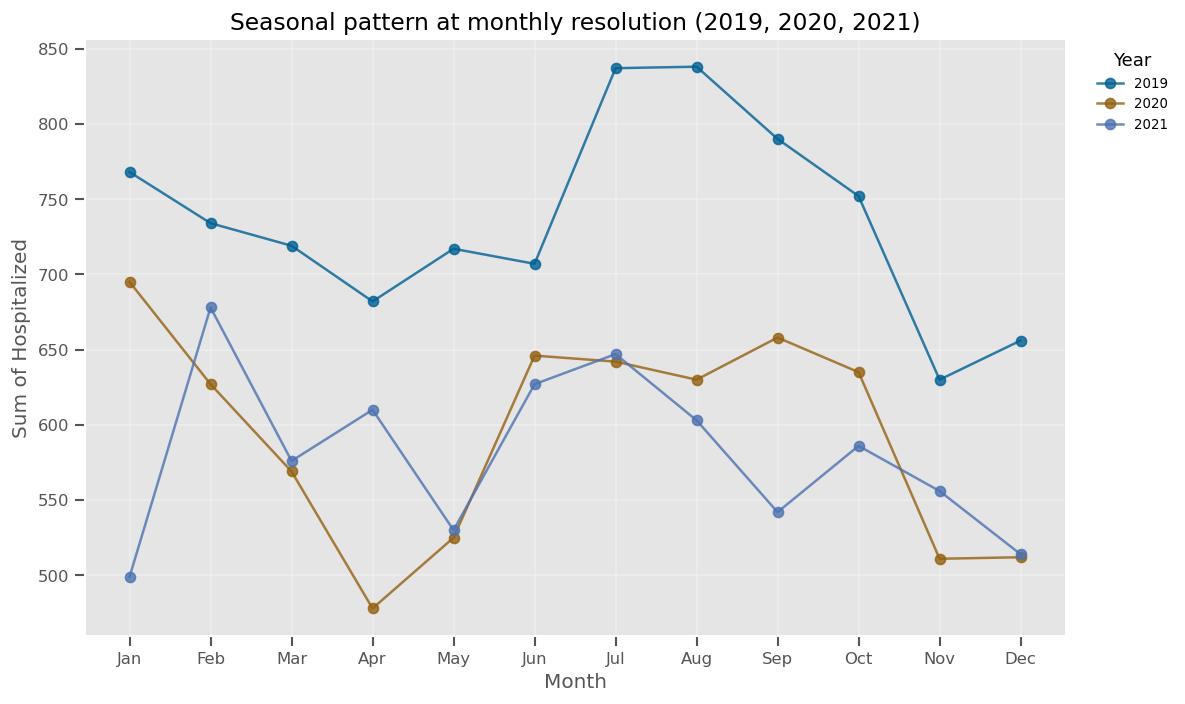

In [44]:
seasonality = plot_monthly_seasonality(df, date_col="EventDate", value_col = "Hospitalized", years=[2019,2020,2021])


c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:229: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  


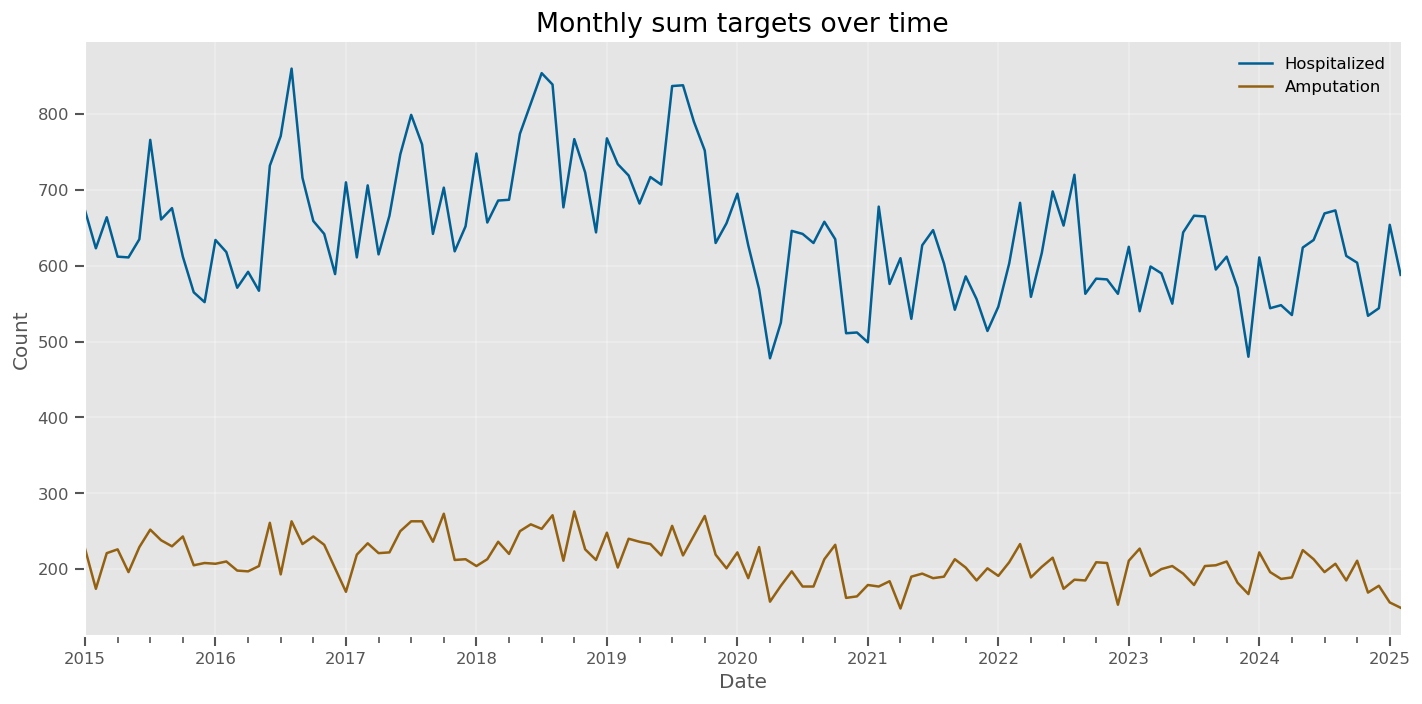

In [45]:
plot_target_timeseries(df, agg_level="monthly")

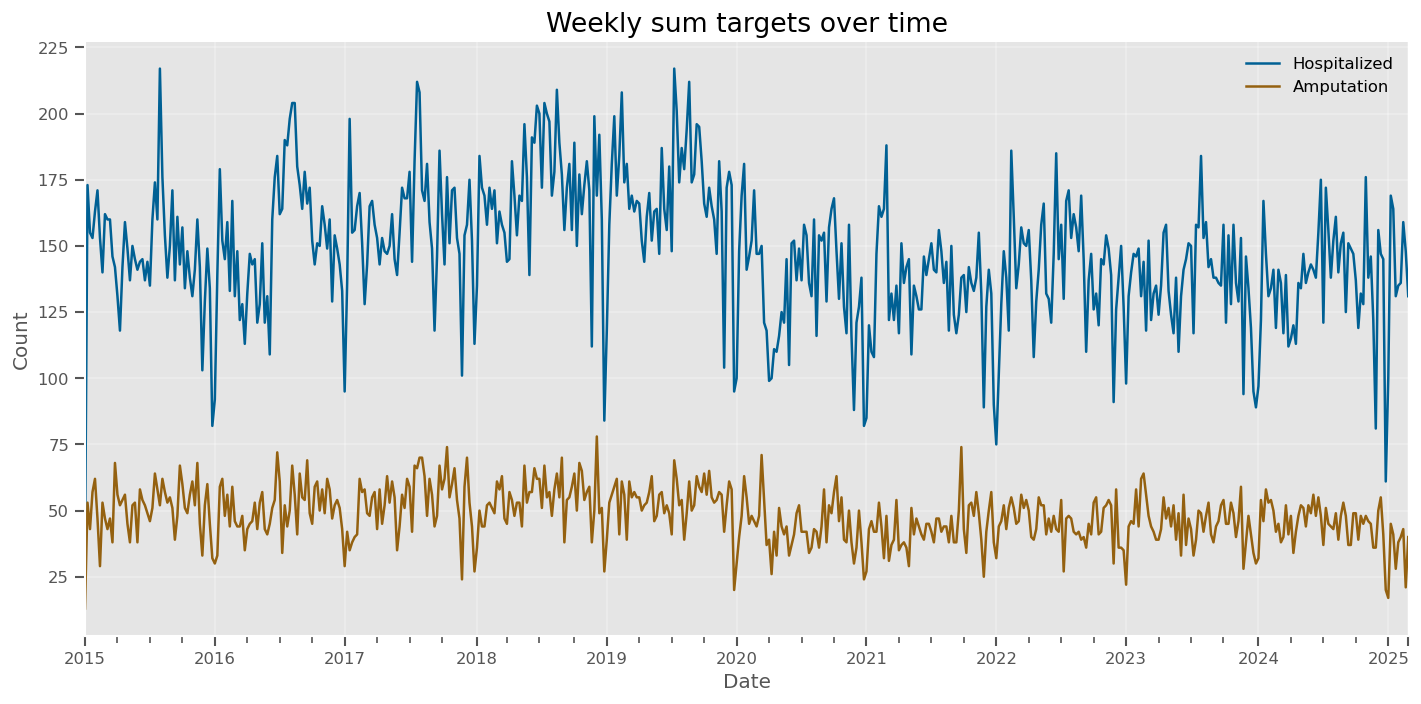

In [46]:
plot_target_timeseries(df, agg_level="weekly")

c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:347: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  



Normality tests for: Hospitalized
Shapiro-Wilk W = 0.9760, p = 0.0279
→ Reject normality (p < 0.05)

Anderson-Darling statistic = 0.7375
Critical values (sig_level %, critical_value):
  15.0%  →  0.5590
  10.0%  →  0.6360
  5.0%  →  0.7630
  2.5%  →  0.8900
  1.0%  →  1.0590

Skewness  = 0.4987
Kurtosis = -0.0729

Normality tests for: Amputation
Shapiro-Wilk W = 0.9893, p = 0.4582
→ Fail to reject normality (p ≥ 0.05)

Anderson-Darling statistic = 0.2673
Critical values (sig_level %, critical_value):
  15.0%  →  0.5590
  10.0%  →  0.6360
  5.0%  →  0.7630
  2.5%  →  0.8900
  1.0%  →  1.0590

Skewness  = 0.1693
Kurtosis = -0.3607


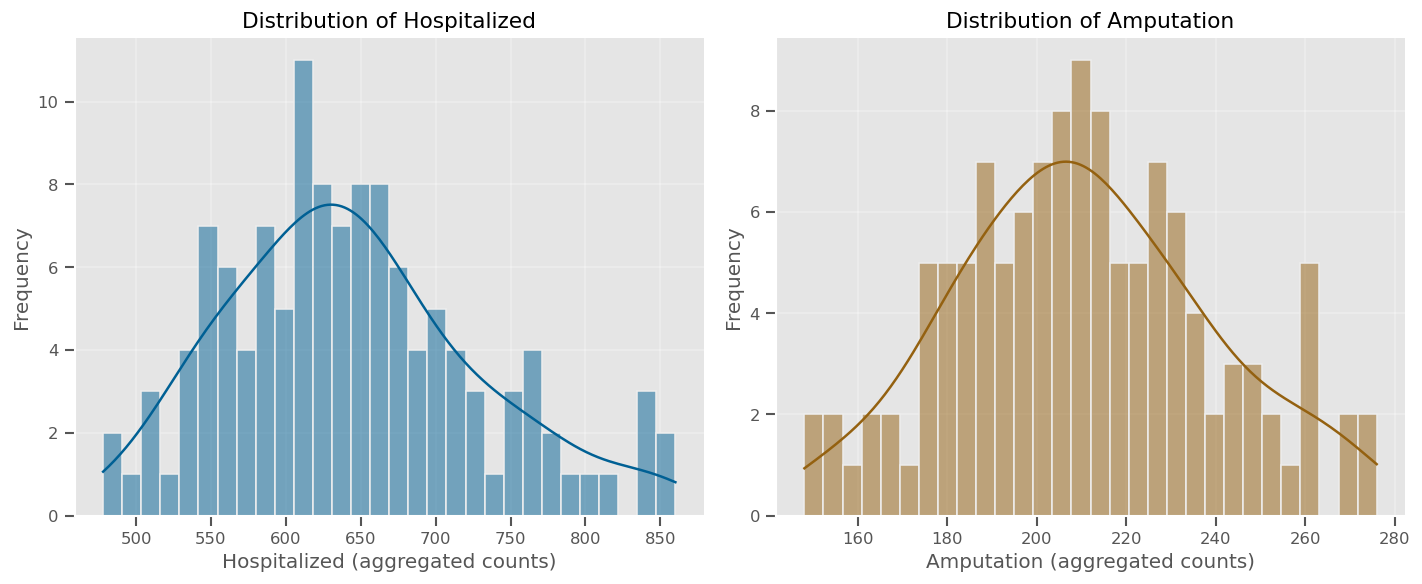

In [47]:
plot_target_histograms(df, agg_level="monthly")

In [28]:
df.head()

ID     UPA  EventDate  \
0  2015010015  931176 2015-01-01   
1  2015010016  930267 2015-01-01   
2  2015010018  929823 2015-01-01   
3  2015010019  929711 2015-01-01   
4  2015010020  929642 2015-01-01   

                                         Employer               Address1  \
0  FCI Otisville Federal Correctional Institution         Two Mile Drive   
1                      Kalahari Manufacturing LLC     171 Progress Drive   
2                 Schneider National Bulk Carrier    420 CORAOPOLIS ROAD   
3                       PEPSI BOTTLING GROUP INC.      4541 HOUSTON AVE.   
4                 North American Pipe Corporation  210 South Arch Street   

          City         State      Zip  Latitude  Longitude  ...  \
0    OTISVILLE      NEW YORK  10963.0     41.46     -74.53  ...   
1  LAKE DELTON     WISCONSIN  53940.0     43.59     -89.79  ...   
2   CORAOPOLIS  PENNSYLVANIA  15108.0     40.49     -80.11  ...   
3        MACON       GEORGIA  31206.0     32.77     -83.65  ...   
4   JANESVILLE     WISCONSIN  53545.0     42.67     -89.04  ...   

                 Part of Body Title  Event  \
0                      Lower leg(s)   1214   
1                    Leg(s), n.e.c.    317   
2                   Nonclassifiable   4331   
3               Leg(s), unspecified    640   
4  Finger(s), fingernail(s), n.e.c.   6411   

                                          EventTitle Source  \
0  Injured by physical contact with person while ...   5721   
1              Ignition of vapors, gases, or liquids   7261   
2         Other fall to lower level less than 6 feet   8421   
3  Caught in or compressed by equipment or object...   8623   
4  Caught in running equipment or machinery durin...    350   

                                         SourceTitle FederalState  Year  \
0                                          Co-worker            1  2015   
1                 Welding, cutting, and blow torches            1  2015   
2                Semi, tractor-trailer, tanker truck            1  2015   
3                                Pallet jack-powered            1  2015   
4  Metal, woodworking, and special material machi...            1  2015   

  NatureGroup                NatureGroupLabel    BodyPartDivision  
0          11  Unspecified traumatic injuries   Lower Extremities  
1          15           Sprains/Strains/Tears   Lower Extremities  
2          10              Other/Unclassified  Other/Unclassified  
3          19        Other traumatic injuries   Lower Extremities  
4          11  Unspecified traumatic injuries   Upper Extremities  

[5 rows x 27 columns]

c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  


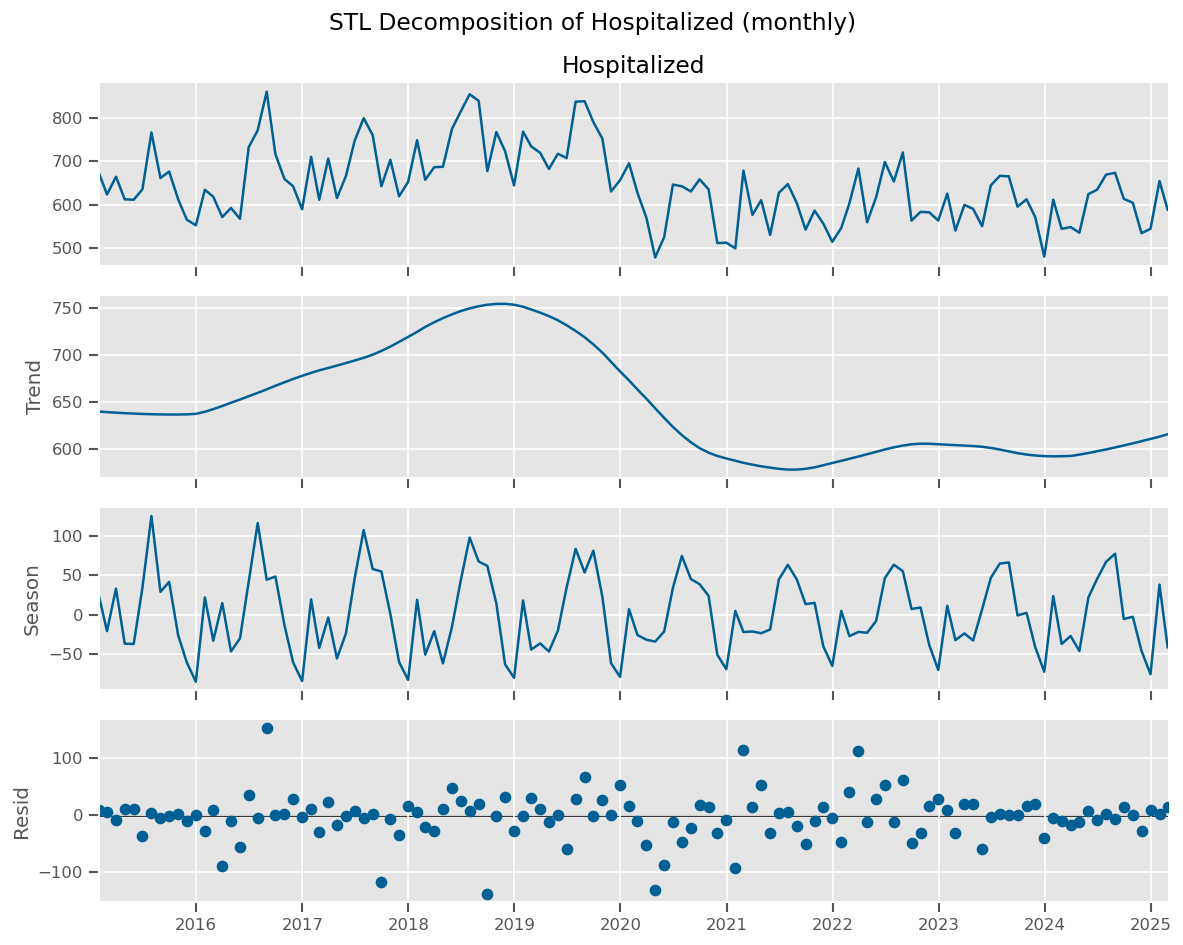

In [48]:
stl_decompose(df, date_col="EventDate")

In [49]:
ts = prepare_series(df, date_col="EventDate", value_col="Hospitalized", freq='ME')

In [50]:
stationarity_tests(ts)

c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print(f"\n=== {state} ===\n")


statistic    pvalue  lags  nobs  \
test                                    
ADF   -1.338015  0.611606    13   108   
KPSS   0.780503  0.010000     5   122   

                                        critical_values         verdict  
test                                                                     
ADF   {'1%': -3.4924012594942333, '5%': -2.888696819...  non-stationary  
KPSS  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...  non-stationary

In [51]:
suggestion_global = suggest_differencing(ts)

c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")


In [52]:
print(suggestion_global["recommended"])

{'d': 1, 'D': 0, 'season_period': None}


In [53]:
diff_summary = suggest_differencing_by_state(
    df,
    state_col="State",
    date_col="EventDate",
    value_col="Hospitalized",
    freq="ME",
    season_period=12,
)

print(diff_summary)

c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual

                   State  d  D  season_period
0                ALABAMA  0  0             12
1               ARKANSAS  1  0             12
2               COLORADO  1  0             12
3            CONNECTICUT  0  0             12
4               DELAWARE  0  0             12
5   DISTRICT OF COLUMBIA  1  0             12
6                FLORIDA  0  0             12
7                GEORGIA  0  0             12
8                  IDAHO  0  0             12
9               ILLINOIS  1  0             12
10                KANSAS  0  0             12
11             LOUISIANA  1  0             12
12                 MAINE  0  0             12
13         MASSACHUSETTS  1  0             12
14           MISSISSIPPI  1  0             12
15              MISSOURI  0  0             12
16               MONTANA  0  0             12
17              NEBRASKA  0  0             12
18         NEW HAMPSHIRE  0  0             12
19            NEW JERSEY  0  0             12
20              NEW YORK  1  0    

c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"\n=== {state} ===\n")
c:\Users\esper\Desktop\injury_forecasting\src\timeseries_utils.py:583: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual

### single state time series analysis

c:\Users\esper\Desktop\injury_forecasting\src\ts_analysis_utils.py:250: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(freq)


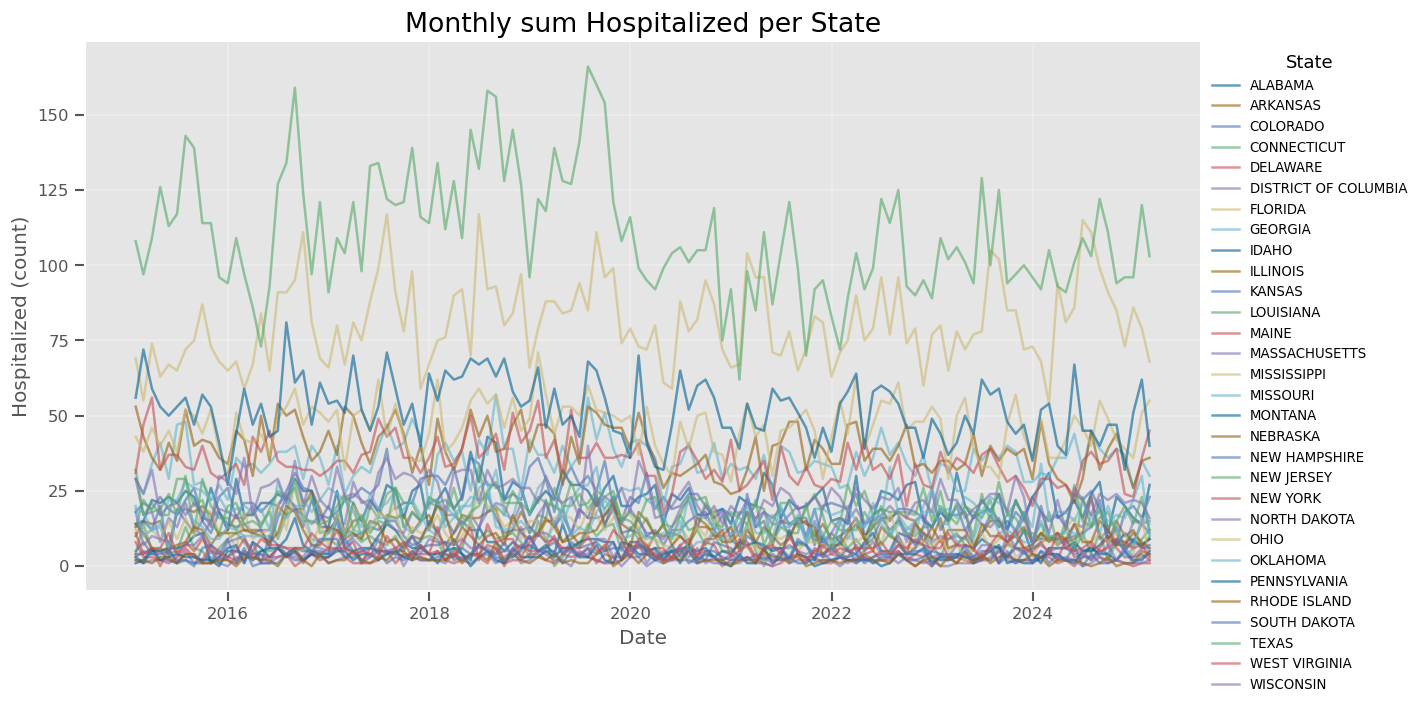

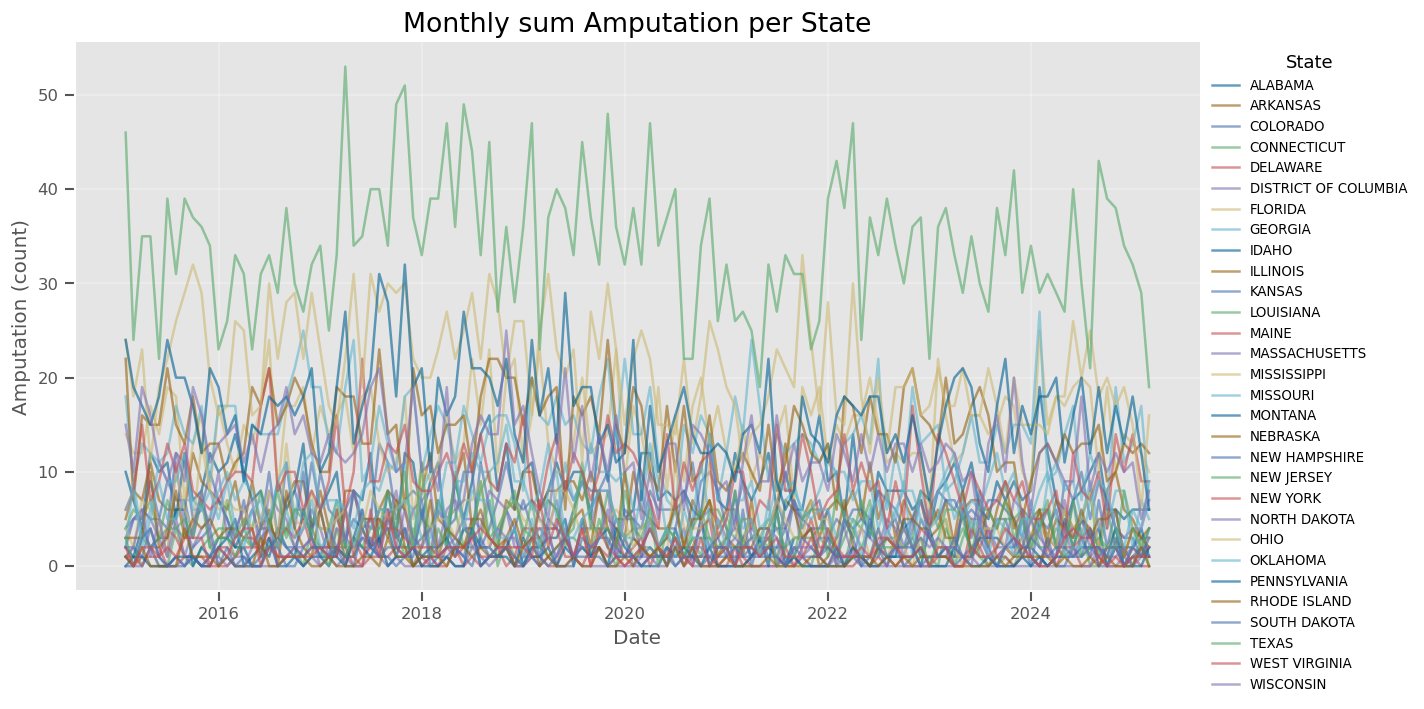

In [8]:
plot_target_timeseries(df, per_state=True, state_col="State")

c:\Users\esper\Desktop\injury_forecasting\src\ts_analysis_utils.py:250: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(freq)


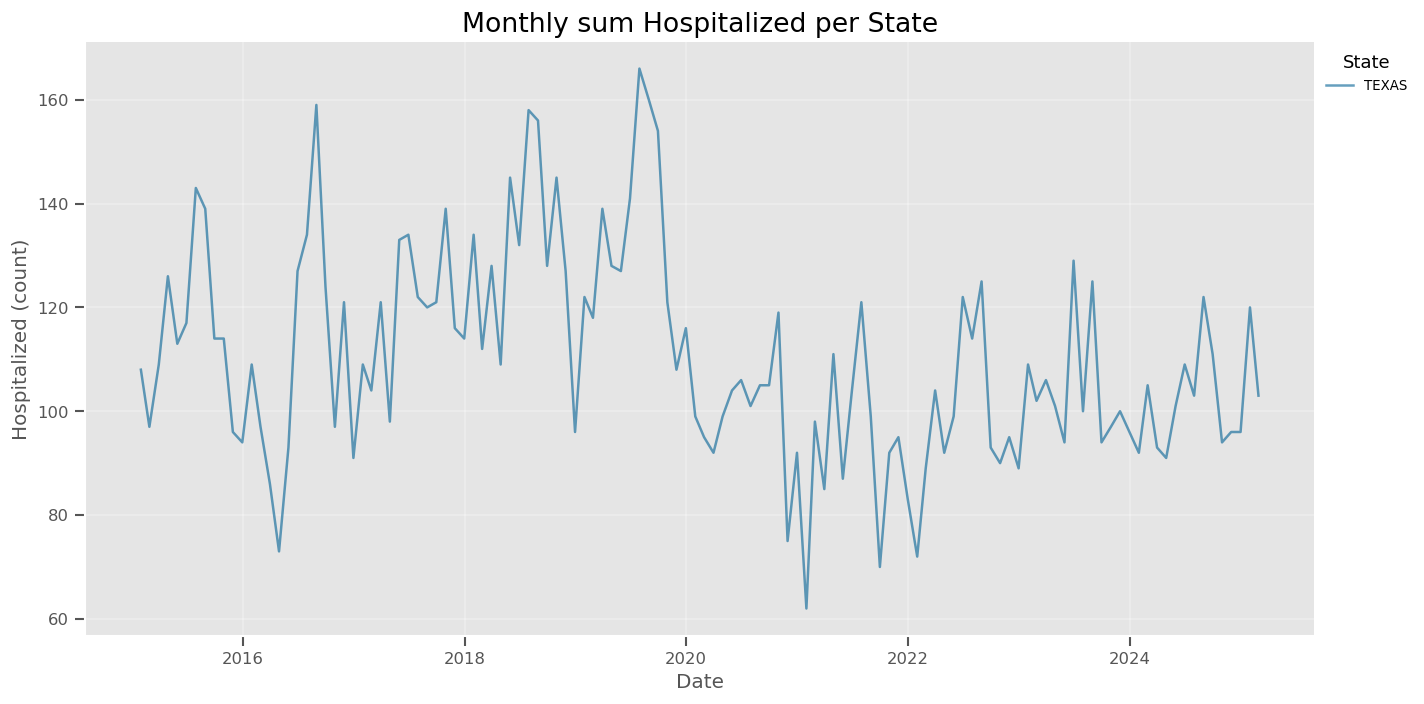

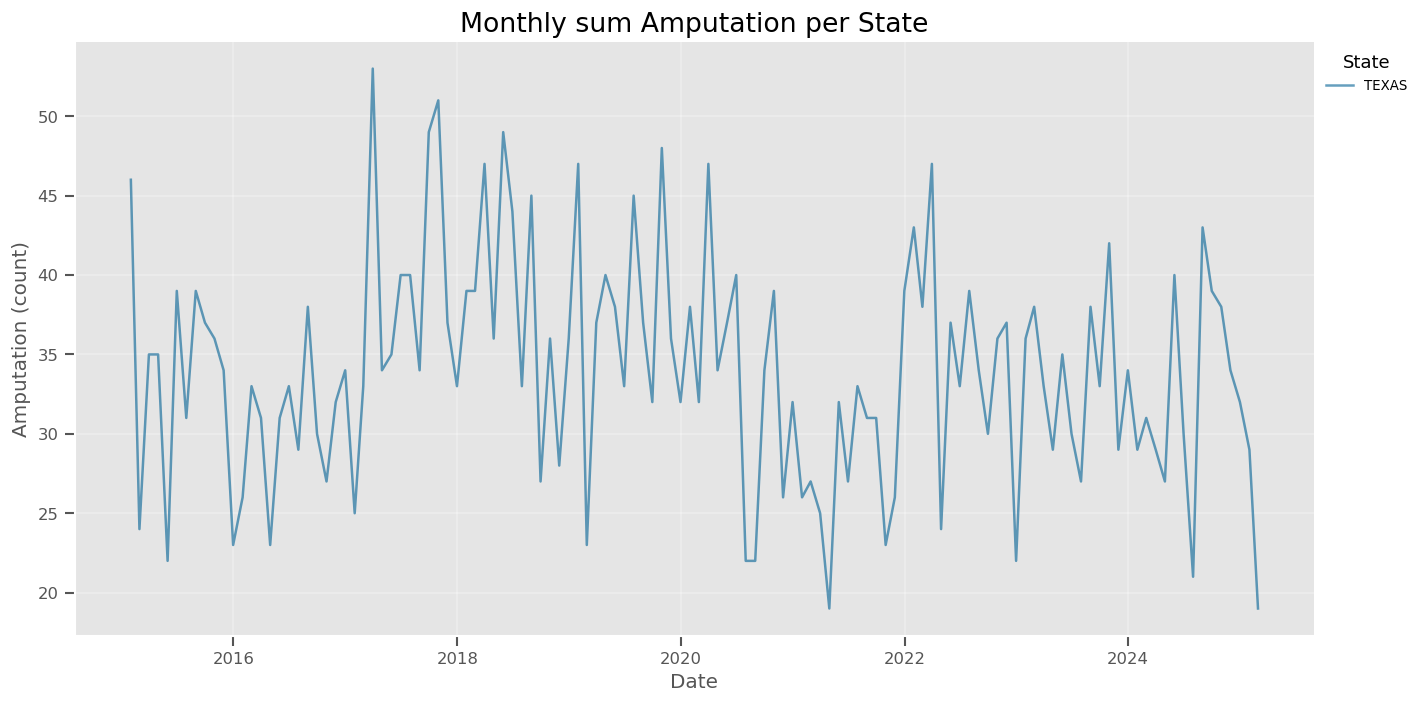

In [ ]:
plot_target_timeseries(df[df['State'] == 'TEXAS'],date_col="EventDate", per_state=True)

In [99]:
plot_target_timeseries(df[df['State'] == 'NORTH DAKOTA'],date_col="EventDate", per_state=True)

NameError: name 'df' is not defined

In [15]:
from src.aggregation import aggregate_panel


In [35]:
texas = aggregate_panel(df=df[df['State'] == 'TEXAS'], date_col="EventDate")

In [24]:
print(texas.head())

   State       Date  Hospitalized
0  TEXAS 2015-01-01           108
1  TEXAS 2015-02-01            97
2  TEXAS 2015-03-01           109
3  TEXAS 2015-04-01           126
4  TEXAS 2015-05-01           113


In [36]:
texas = texas.set_index('Date').sort_index()

In [37]:
texas

State  Hospitalized
Date                           
2015-01-01  TEXAS           108
2015-02-01  TEXAS            97
2015-03-01  TEXAS           109
2015-04-01  TEXAS           126
2015-05-01  TEXAS           113
...           ...           ...
2024-10-01  TEXAS            94
2024-11-01  TEXAS            96
2024-12-01  TEXAS            96
2025-01-01  TEXAS           120
2025-02-01  TEXAS           103

[122 rows x 2 columns]

In [38]:
texas_ts = texas['Hospitalized']

In [39]:
print(texas_ts)

Date
2015-01-01    108
2015-02-01     97
2015-03-01    109
2015-04-01    126
2015-05-01    113
             ... 
2024-10-01     94
2024-11-01     96
2024-12-01     96
2025-01-01    120
2025-02-01    103
Name: Hospitalized, Length: 122, dtype: int64


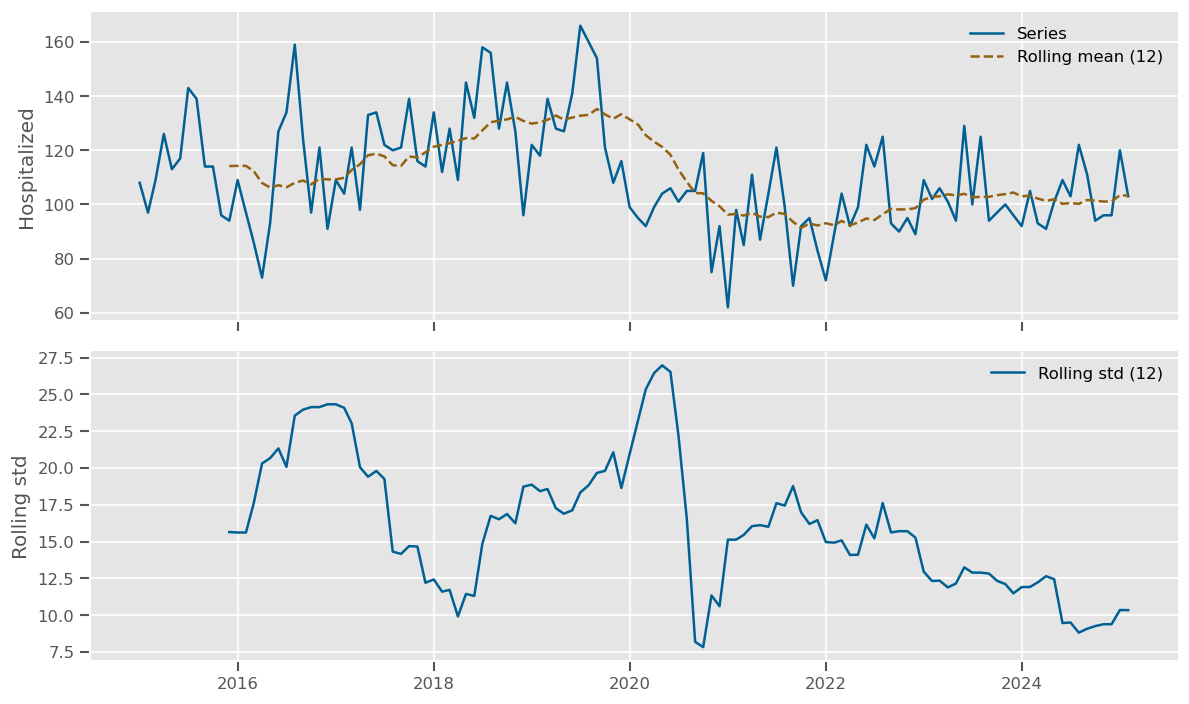

In [40]:
plot_ts_with_rolling(texas_ts, window=12)

In [5]:
monthly_complete = pd.read_csv(DATA_DIR / "cleaned" / "cleaned_monthly_panel.csv", parse_dates=['Date'])

In [7]:
monthly_complete = monthly_complete.sort_values(["State", "Date"])


In [9]:
monthly_complete.columns

Index(['State', 'Date', 'HospRisk'], dtype='object')

In [10]:
zero_prop = (
    monthly_complete
    .assign(is_zero=monthly_complete["HospRisk"] == 0)
    .groupby("State")["is_zero"]
    .mean()
)

zero_prop


State
ALABAMA                 0.000000
ARKANSAS                0.000000
COLORADO                0.000000
CONNECTICUT             0.016667
DELAWARE                0.066667
DISTRICT OF COLUMBIA    0.083333
FLORIDA                 0.000000
GEORGIA                 0.000000
IDAHO                   0.000000
ILLINOIS                0.000000
KANSAS                  0.000000
LOUISIANA               0.000000
MAINE                   0.008333
MASSACHUSETTS           0.000000
MISSISSIPPI             0.000000
MISSOURI                0.000000
MONTANA                 0.041667
NEBRASKA                0.000000
NEW HAMPSHIRE           0.016667
NEW JERSEY              0.000000
NEW YORK                0.000000
NORTH DAKOTA            0.000000
OHIO                    0.000000
OKLAHOMA                0.000000
PENNSYLVANIA            0.000000
RHODE ISLAND            0.091667
SOUTH DAKOTA            0.016667
TEXAS                   0.000000
WEST VIRGINIA           0.000000
WISCONSIN               0.000000
Name

In [14]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


Normality tests for: HospRisk
Shapiro-Wilk W = 0.9570, p = 0.0000
→ Reject normality (p < 0.05)

Anderson-Darling statistic = 20.3361
Critical values (sig_level %, critical_value):
  15.0%  →  0.5750
  10.0%  →  0.6550
  5.0%  →  0.7860
  2.5%  →  0.9170
  1.0%  →  1.0910

Skewness  = 0.9793
Kurtosis = 2.7980


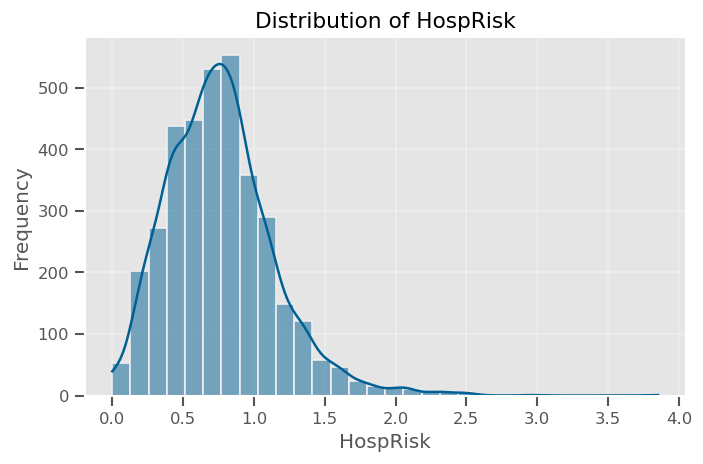

In [19]:
plot_target_histograms(monthly_complete, date_col="Date", targets=('HospRisk',), per_state=True, agg_level=None)

In [25]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def plot_hosprisk_small_multiples(
    panel: pd.DataFrame,
    states: list[str] | None = None,
    date_col: str = "Date",
    state_col: str = "State",
    value_col: str = "HospRisk",
    start: str | None = None,
    end: str | None = None,
    ncols: int = 4,
) -> None:
    df = panel.copy()
    df[date_col] = pd.to_datetime(df[date_col])

    if states is None:
        states = sorted(df[state_col].unique())
    else:
        states = list(states)

    # optional date range
    if start is not None:
        df = df[df[date_col] >= pd.to_datetime(start)]
    if end is not None:
        df = df[df[date_col] <= pd.to_datetime(end)]

    df = df[df[state_col].isin(states)].sort_values([state_col, date_col])

    n = len(states)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, st in enumerate(states):
        ax = axes[i]
        g = df[df[state_col] == st]
        ax.plot(g[date_col], g[value_col], alpha=0.9)
        ax.set_title(st, fontsize=10)
        ax.tick_params(axis="x", labelsize=8, rotation=30)
        ax.grid(alpha=0.2)

    for j in range(n, len(axes)):
        axes[j].axis("off")

    fig.suptitle("HospRisk over time by state", y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()


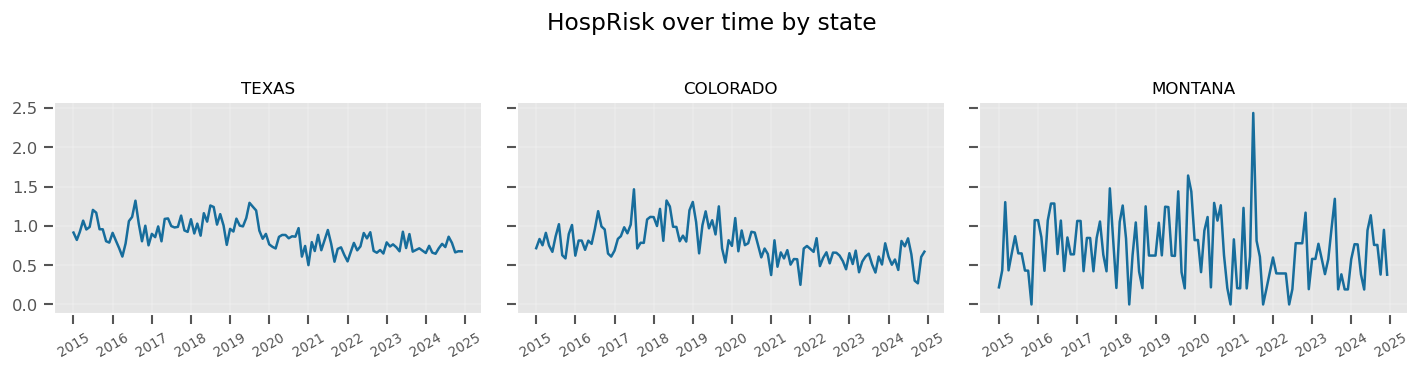

In [26]:
plot_hosprisk_small_multiples(monthly_complete, states=["TEXAS", "COLORADO", "MONTANA"], ncols=3)


In [28]:
from src.aggregation import aggregate_panel, check_panel_balance

In [29]:
check_panel_balance(monthly_complete)

{'is_balanced': True,
 'n_groups': 30,
 'n_periods': 120,
 'rows_expected': 3600,
 'rows_actual': 3600,
 'periods_per_group': State
 ALABAMA                 120
 ARKANSAS                120
 COLORADO                120
 CONNECTICUT             120
 DELAWARE                120
 DISTRICT OF COLUMBIA    120
 FLORIDA                 120
 GEORGIA                 120
 IDAHO                   120
 ILLINOIS                120
 KANSAS                  120
 LOUISIANA               120
 MAINE                   120
 MASSACHUSETTS           120
 MISSISSIPPI             120
 MISSOURI                120
 MONTANA                 120
 NEBRASKA                120
 NEW HAMPSHIRE           120
 NEW JERSEY              120
 NEW YORK                120
 NORTH DAKOTA            120
 OHIO                    120
 OKLAHOMA                120
 PENNSYLVANIA            120
 RHODE ISLAND            120
 SOUTH DAKOTA            120
 TEXAS                   120
 WEST VIRGINIA           120
 WISCONSIN               12

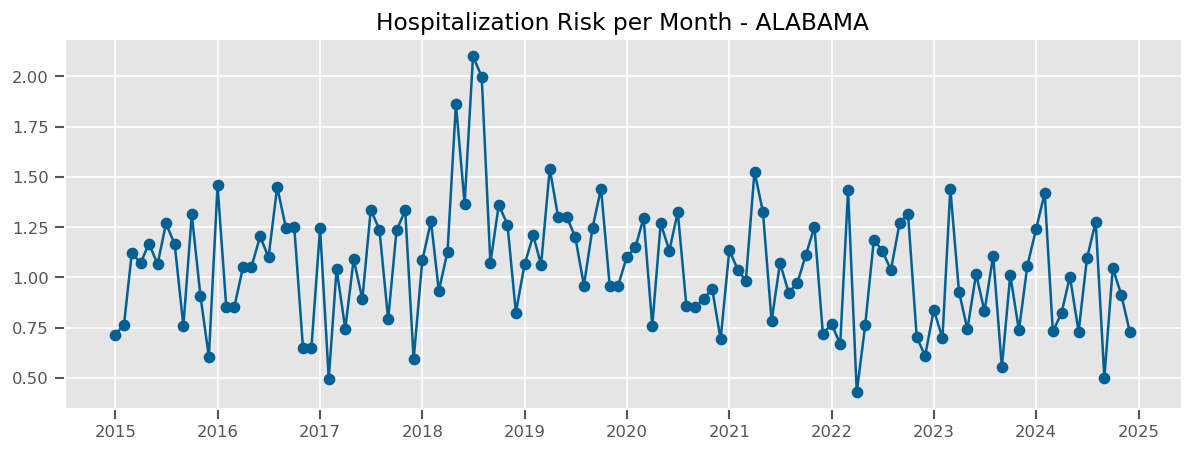

In [31]:
import matplotlib.pyplot as plt

state = "ALABAMA"

temp = monthly_complete[monthly_complete['State'] == state]

plt.figure(figsize=(12, 4))
plt.plot(temp['Date'], temp["HospRisk"], marker='o', label=state)
plt.title(f"Hospitalization Risk per Month - {state}")
plt.show()

In [87]:
from src.plotting import plot_timeseries

In [112]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def _format_month_axis(ax) -> None:
    """Force month ticks (Jan–Dec) and compact labels."""
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))


def plot_hosprisk_timeseries(
    df: pd.DataFrame,
    date_col: str = "Date",
    target: str = "HospRisk",
    state_col: str = "State",
    agg: str = "mean",
    per_state: bool = False,
    facet: bool = True,
    state: str | None = None,
    year: int | None = None,
    ncols: int = 6,
    sharey: bool = True,
    figsize_per_col: float = 3.0,
    figsize_per_row: float = 2.2,
) -> None:
    """
    Plot HospRisk time series from a monthly-complete panel.

    Modes
    -----
    - state is not None:
        Plot a single state's series (optionally restricted to `year`).
    - per_state=False:
        National aggregation over states (optionally restricted to `year`).
    - per_state=True, facet=True:
        Faceted small-multiples plot (one panel per state).
        (If `year` is provided, facets are restricted to that year and use month ticks.)
    - per_state=True, facet=False:
        Overlaid per-state lines (can be cluttered).

    Parameters
    ----------
    agg : str
        Aggregation across states when per_state=False (e.g. 'mean', 'median').
    year : int or None
        If provided, filter to that calendar year and show month ticks.
    """

    df_ = df.copy()
    df_[date_col] = pd.to_datetime(df_[date_col])

    # ==========================================================
    # Single state override
    # ==========================================================
    if state is not None:
        g = (
            df_
            .loc[df_[state_col] == state]
            .sort_values(date_col)
        )

        if year is not None:
            g = g.loc[g[date_col].dt.year == year]

        if g.empty:
            raise ValueError(f"No data for state={state!r}, year={year!r}.")

        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(g[date_col], g[target], linewidth=2)

        title = f"Monthly {target} — {state}"
        if year is not None:
            title += f" ({year})"

        ax.set_title(title, fontsize=16)
        ax.set_xlabel("Month" if year is not None else "Date")
        ax.set_ylabel(target)
        ax.grid(alpha=0.3)

        if year is not None:
            _format_month_axis(ax)

        plt.tight_layout()
        plt.show()
        return

    # ==========================================================
    # National aggregation
    # ==========================================================
    if not per_state:
        agg_df = (
            df_
            .groupby(date_col)[target]
            .agg(agg)
            .sort_index()
        )

        if year is not None:
            agg_df = agg_df.loc[agg_df.index.year == year]

        if agg_df.empty:
            raise ValueError(f"No data for year={year!r}.")

        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(agg_df.index, agg_df.values, linewidth=2)

        title = f"Monthly {agg} {target} (national)"
        if year is not None:
            title += f" ({year})"

        ax.set_title(title, fontsize=16)
        ax.set_xlabel("Month" if year is not None else "Date")
        ax.set_ylabel(target)
        ax.grid(alpha=0.3)

        if year is not None:
            _format_month_axis(ax)

        plt.tight_layout()
        plt.show()
        return

    # ==========================================================
    # Per-state plots
    # ==========================================================
    states = sorted(df_[state_col].unique())

    # -------------------------- faceted --------------------------
    if facet:
        n = len(states)
        nrows = math.ceil(n / ncols)

        fig_w = ncols * figsize_per_col
        fig_h = nrows * figsize_per_row

        fig, axes = plt.subplots(
            nrows=nrows,
            ncols=ncols,
            figsize=(fig_w, fig_h),
            sharex=True,
            sharey=sharey,
        )
        axes = axes.ravel()

        for i, st in enumerate(states):
            ax = axes[i]
            g = (
                df_
                .loc[df_[state_col] == st]
                .sort_values(date_col)
            )

            if year is not None:
                g = g.loc[g[date_col].dt.year == year]

            ax.plot(g[date_col], g[target], linewidth=1.2)
            ax.set_title(st, fontsize=9)
            ax.grid(alpha=0.25)
            ax.tick_params(axis="x", labelsize=7)
            ax.tick_params(axis="y", labelsize=7)

            if year is not None:
                _format_month_axis(ax)

        # Disable unused panels
        for j in range(i + 1, len(axes)):
            axes[j].axis("off")

        main_title = f"Monthly {target} by {state_col}"
        if year is not None:
            main_title += f" ({year})"

        fig.suptitle(main_title, fontsize=14, y=1.02)
        fig.text(0.5, 0.01, "Month" if year is not None else "Date", ha="center")
        fig.text(0.01, 0.5, target, va="center", rotation="vertical")

        plt.tight_layout()
        plt.show()
        return

    # -------------------------- overlaid --------------------------
    fig, ax = plt.subplots(figsize=(12, 6))

    for st in states:
        g = df_.loc[df_[state_col] == st].sort_values(date_col)
        if year is not None:
            g = g.loc[g[date_col].dt.year == year]
        ax.plot(g[date_col], g[target], alpha=0.5)

    title = f"Monthly {target} per {state_col}"
    if year is not None:
        title += f" ({year})"

    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Month" if year is not None else "Date")
    ax.set_ylabel(target)
    ax.grid(alpha=0.3)

    if year is not None:
        _format_month_axis(ax)

    plt.tight_layout()
    plt.show()


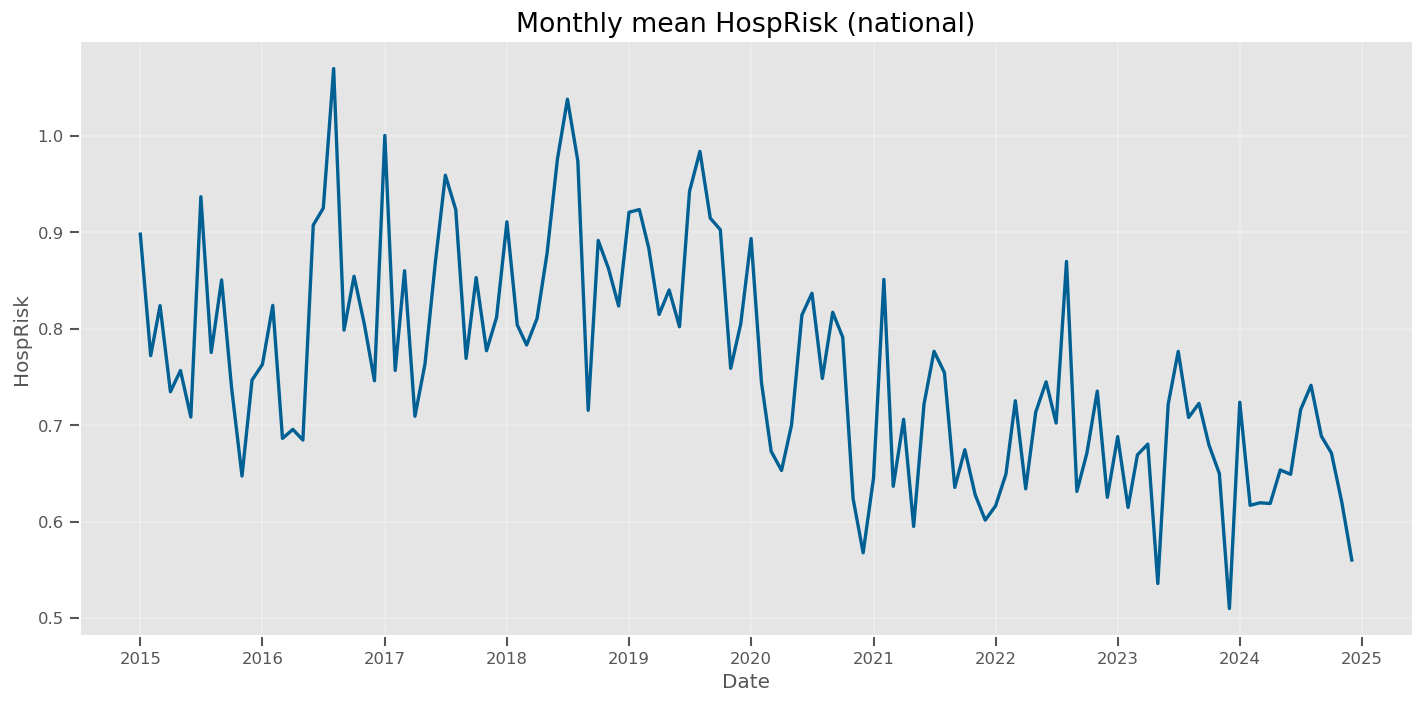

In [113]:
plot_hosprisk_timeseries(monthly_complete)

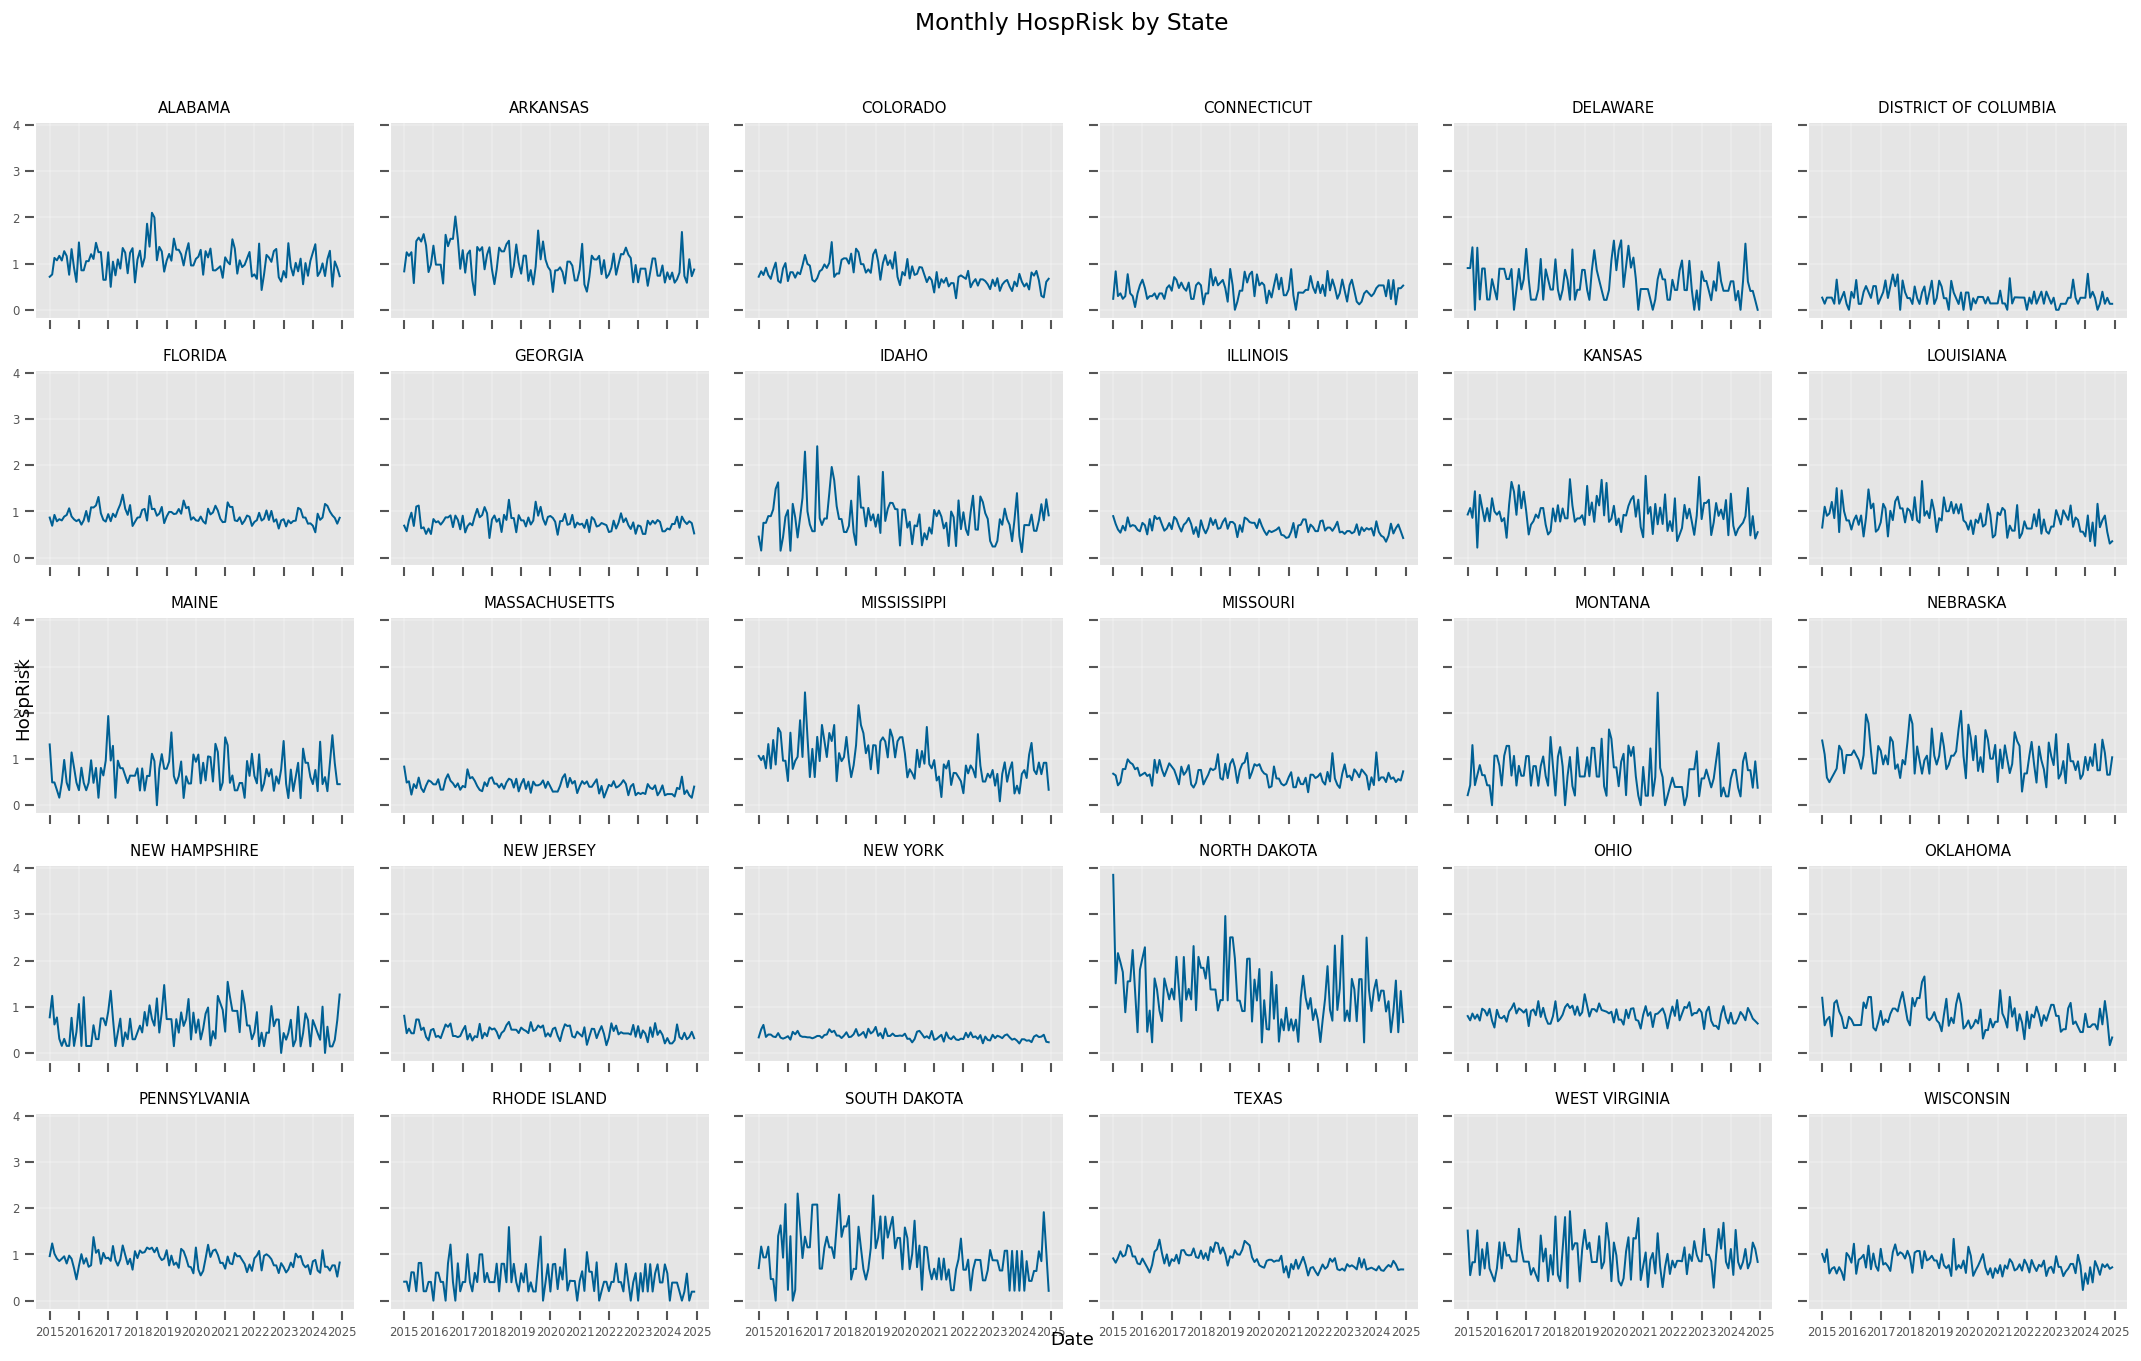

In [114]:
plot_hosprisk_timeseries(monthly_complete, per_state=True)

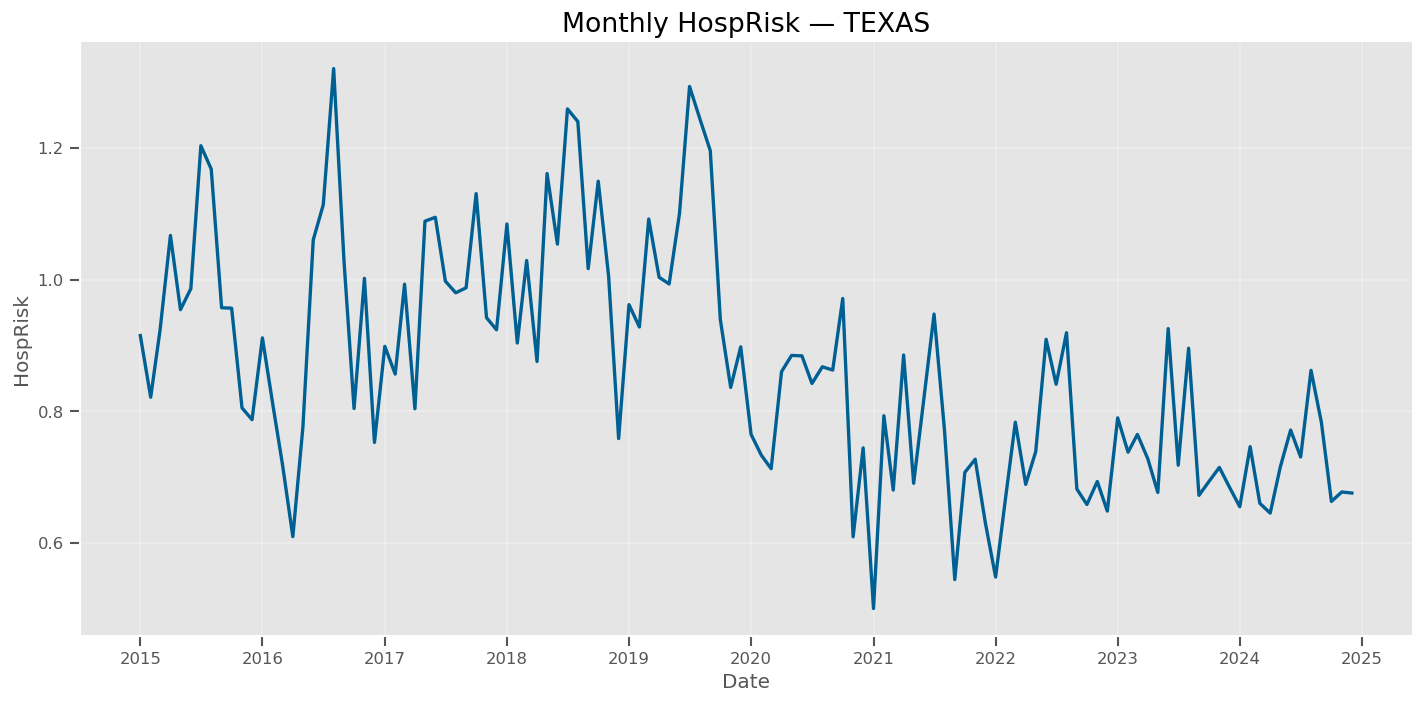

In [115]:
plot_hosprisk_timeseries(monthly_complete, state="TEXAS")

In [117]:
def get_national_hosprisk_by_year(
    df: pd.DataFrame,
    year: int,
    date_col: str = "Date",
    target: str = "HospRisk",
    agg: str = "mean",
) -> pd.Series:
    """
    Return national monthly HospRisk for a given year,
    indexed by month (1–12).
    """
    df_ = df.copy()
    df_[date_col] = pd.to_datetime(df_[date_col])

    s = (
        df_
        .loc[df_[date_col].dt.year == year]
        .groupby(date_col)[target]
        .agg(agg)
        .sort_index()
    )

    # Reindex to month number (1–12) for easy overlay
    s.index = s.index.month
    s.name = str(year)

    return s


In [118]:
years = [2019, 2020, 2021, 2022, 2023, 2024]

series = [
    get_national_hosprisk_by_year(monthly_complete, y)
    for y in years
]

df_years = pd.concat(series, axis=1)
df_years


2019      2020      2021      2022      2023      2024
Date                                                            
1     0.920814  0.893569  0.645015  0.616339  0.688128  0.723805
2     0.923534  0.744310  0.851113  0.649392  0.614655  0.616885
3     0.883729  0.672927  0.636610  0.725315  0.669201  0.619484
4     0.814795  0.653037  0.706074  0.633966  0.680323  0.618776
5     0.840194  0.700312  0.594934  0.713590  0.535782  0.653542
6     0.802019  0.814309  0.721854  0.744897  0.721719  0.649015
7     0.942577  0.836823  0.776607  0.702181  0.776507  0.716109
8     0.983900  0.748399  0.754527  0.869749  0.708007  0.741332
9     0.914645  0.817079  0.635425  0.631309  0.722543  0.688538
10    0.902708  0.791127  0.674536  0.671167  0.679380  0.671121
11    0.758904  0.623721  0.627765  0.735311  0.649750  0.620189
12    0.805050  0.567637  0.601480  0.625197  0.509872  0.560150

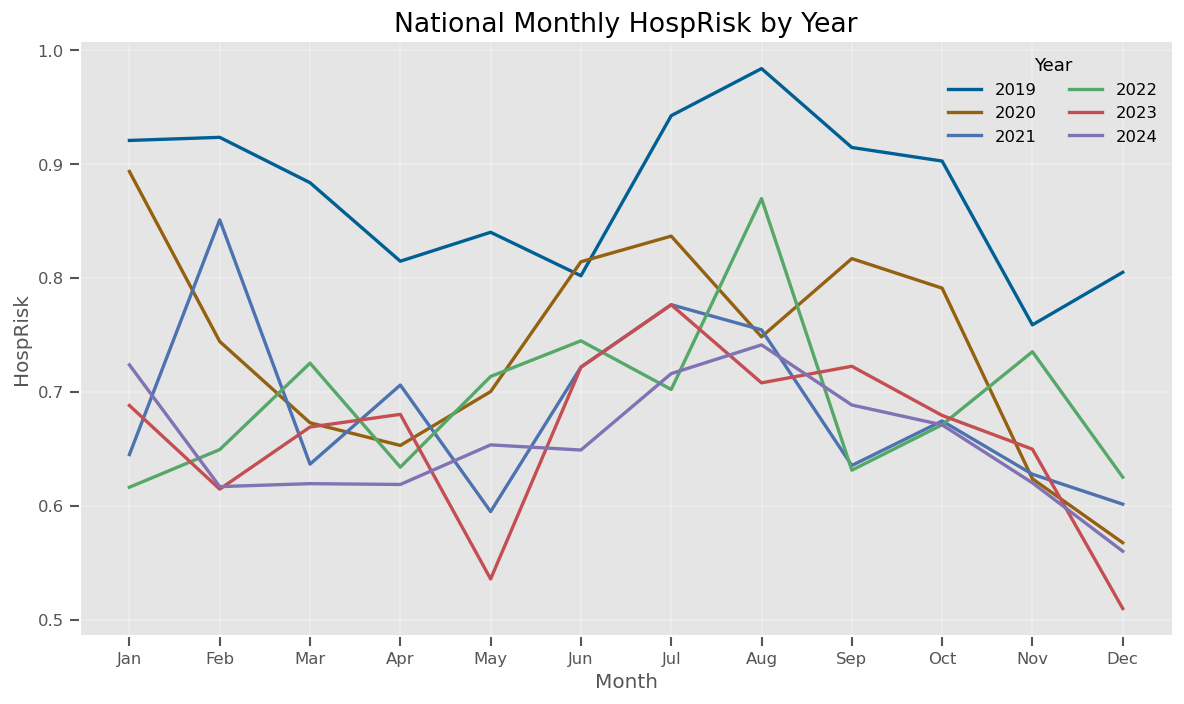

In [ ]:


fig, ax = plt.subplots(figsize=(10, 6))

for year in df_years.columns:
    ax.plot(df_years.index, df_years[year], label=year, linewidth=2)

ax.set_xticks(range(1, 13))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun",
                     "Jul","Aug","Sep","Oct","Nov","Dec"])

ax.set_title("National Monthly HospRisk by Year", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("HospRisk")
ax.grid(alpha=0.3)
ax.legend(title="Year", ncol=2)

plt.tight_layout()
plt.show()


In [98]:
(
    monthly_complete
    .loc[monthly_complete["State"] == "NORTH DAKOTA"]
    .assign(year=lambda x: x["Date"].dt.year)
    .groupby("Date")
    .size()
    .head(12)
)


Date
2015-01-01    1
2015-02-01    1
2015-03-01    1
2015-04-01    1
2015-05-01    1
2015-06-01    1
2015-07-01    1
2015-08-01    1
2015-09-01    1
2015-10-01    1
2015-11-01    1
2015-12-01    1
dtype: int64

In [100]:
nd = (
    monthly_complete
    .loc[monthly_complete["State"] == "NORTH DAKOTA"]
    .sort_values("Date")
)

nd.head(10)[["Date", "HospRisk"]]


Date  HospRisk
2520 2015-01-01  3.853565
2521 2015-02-01  1.505700
2522 2015-03-01  2.160294
2523 2015-04-01  1.962923
2524 2015-05-01  1.749781
2525 2015-06-01  0.880475
2526 2015-07-01  1.547303
2527 2015-08-01  1.552106
2528 2015-09-01  2.227668
2529 2015-10-01  1.342582

In [107]:
def statewise_outlier_diagnostics(
    df,
    state_col="State",
    date_col="Date",
    target="HospRisk",
    z_thresh=5.0,
):
    rows = []

    for state, g in df.groupby(state_col):
        g = g.sort_values(date_col).copy()

        med = g[target].median()
        mad = (g[target] - med).abs().median()

        if mad == 0 or pd.isna(mad):
            continue

        g["z"] = 0.6745 * (g[target] - med) / mad

        flagged = g.loc[g["z"].abs() > z_thresh,
                        [state_col, date_col, target, "z"]]

        if not flagged.empty:
            rows.append(flagged)

    if rows:
        return pd.concat(rows, ignore_index=True)

    return pd.DataFrame(
        columns=[state_col, date_col, target, "z"]
    )


In [111]:
def max_robust_z(s: pd.Series) -> float:
    med = s.median()
    mad = (s - med).abs().median()
    if mad == 0 or pd.isna(mad):
        return float("nan")
    z = 0.6745 * (s - med) / mad
    return float(z.abs().max())

maxz = (
    tmp.groupby("State")["HospRisk"]
       .apply(max_robust_z)
       .sort_values(ascending=False)
)

maxz.head(10)



State
MONTANA         4.958712
MAINE           4.842517
IDAHO           4.811491
NORTH DAKOTA    4.218928
RHODE ISLAND    3.945317
NEW YORK        3.873771
OKLAHOMA        3.689139
MISSISSIPPI     3.566030
FLORIDA         3.551211
GEORGIA         3.543202
Name: HospRisk, dtype: float64

In [122]:

from statsmodels.tsa.seasonal import STL


def stl_decompose(
    df: pd.DataFrame,
    date_col: str = "Date",
    value_col: str = "HospRisk",
    agg_level: str = "monthly",   # "monthly" or "weekly"
    agg: str = "mean",            # mean for HospRisk; sum for counts
    period: int | None = None,    # 12 monthly, 52 weekly
    plot: bool = True,
    state_col: str = "State",
    state: str | None = None,     # if set -> decompose that state
    robust: bool = True,
):
    """
    STL decomposition for an already-prepared panel at monthly/weekly frequency.

    If state is None:
        aggregates across states by Date (using `agg`) -> national series.
    If state is provided:
        filters to that state -> state series.

    Returns
    -------
    result : STL fit result (statsmodels)
    """
    df_ = df.copy()
    df_[date_col] = pd.to_datetime(df_[date_col])

    level = agg_level.lower()
    if level in {"monthly", "month", "m"}:
        freq = "MS"
        default_period = 12
    elif level in {"weekly", "week", "w"}:
        freq = "W"
        default_period = 52
    else:
        raise ValueError(f"Unsupported agg_level: {agg_level!r}. Use 'monthly' or 'weekly'.")

    if period is None:
        period = default_period

    # --- build the series (no resampling; data is already prepared) ---
    if state is not None:
        ts = (
            df_.loc[df_[state_col] == state, [date_col, value_col]]
               .sort_values(date_col)
               .set_index(date_col)[value_col]
        )
        if ts.empty:
            raise ValueError(f"No data for state={state!r}.")
        who = state
    else:
        ts = (
            df_.groupby(date_col)[value_col]
               .agg(agg)
               .sort_index()
        )
        who = f"national ({agg})"

    # --- ensure a regular index & no NaNs (STL requires this) ---
    full_idx = pd.date_range(ts.index.min(), ts.index.max(), freq=freq)
    ts = ts.reindex(full_idx)
    if ts.isna().any():
        ts = ts.interpolate(limit_direction="both")

    stl = STL(ts, period=period, robust=robust)
    result = stl.fit()

    if plot:
        fig = result.plot()
        fig.set_size_inches(10, 8)
        fig.suptitle(
            f"STL Decomposition of {value_col} ({agg_level}, {who})",
            fontsize=14
        )
        plt.tight_layout()
        plt.show()

    return result


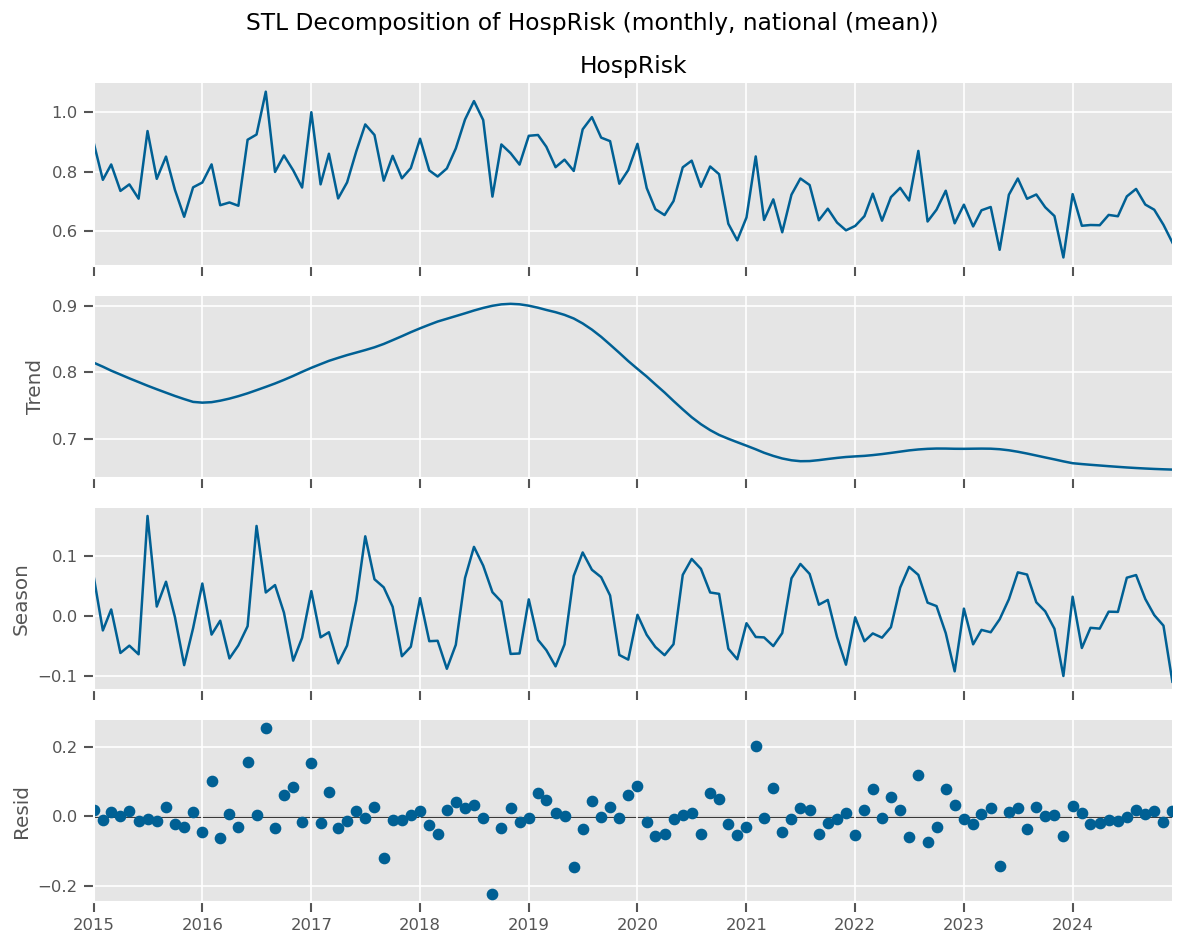

In [123]:
stl_decompose(monthly_complete, agg_level="monthly", value_col="HospRisk", agg="mean")

In [126]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import pandas as pd


def plot_acf_pacf(
    df: pd.DataFrame,
    date_col: str = "Date",
    value_col: str = "HospRisk",
    agg_level: str = "monthly",      # "monthly" or "weekly"
    agg: str = "mean",               # mean for HospRisk; sum for counts
    state_col: str = "State",
    state: str | None = None,        # if set -> single state
    lags: int | None = None,
    alpha: float = 0.05,
    pacf_method: str = "ywm",        # robust default in statsmodels
    stationarize: str = "none",      # "none" | "diff" | "seasdiff" | "diff+seasdiff" | "stl_resid"
) -> None:
    """
    Plot ACF and PACF for a monthly/weekly panel series (national aggregate or single state).
    Optionally stationarize before computing ACF/PACF.

    stationarize:
      - "none": raw series
      - "diff": first difference
      - "seasdiff": seasonal difference (12 for monthly, 52 for weekly)
      - "diff+seasdiff": first + seasonal difference
      - "stl_resid": STL residuals (removes trend + seasonality)
    """

    df_ = df.copy()
    df_[date_col] = pd.to_datetime(df_[date_col])

    level = agg_level.lower()
    if level in {"monthly", "month", "m"}:
        freq = "MS"
        default_lags = 24
        season_period = 12
    elif level in {"weekly", "week", "w"}:
        freq = "W"
        default_lags = 104
        season_period = 52
    else:
        raise ValueError(f"Unsupported agg_level: {agg_level!r}. Use 'monthly' or 'weekly'.")

    if lags is None:
        lags = default_lags

    # Build series (no resampling; your panel is already at freq)
    if state is not None:
        ts = (
            df_.loc[df_[state_col] == state, [date_col, value_col]]
               .sort_values(date_col)
               .set_index(date_col)[value_col]
        )
        if ts.empty:
            raise ValueError(f"No data for state={state!r}.")
        who = state
    else:
        ts = (
            df_.groupby(date_col)[value_col]
               .agg(agg)
               .sort_index()
        )
        who = f"national ({agg})"

    # Ensure regular spacing and no NaNs
    full_idx = pd.date_range(ts.index.min(), ts.index.max(), freq=freq)
    ts = ts.reindex(full_idx)
    if ts.isna().any():
        ts = ts.interpolate(limit_direction="both")

    # --- Stationarize ---
    st = stationarize.lower()
    ts_used = ts.copy()
    label = f"{value_col} ({agg_level}, {who})"

    if st == "none":
        pass

    elif st == "diff":
        ts_used = ts_used.diff()

    elif st == "seasdiff":
        ts_used = ts_used.diff(season_period)

    elif st in {"diff+seasdiff", "seasdiff+diff"}:
        ts_used = ts_used.diff(season_period).diff()

    elif st == "stl_resid":
        # STL assumes a stable seasonal period; robust helps with outliers
        stl = STL(ts_used, period=season_period, robust=True)
        res = stl.fit()
        ts_used = res.resid

    else:
        raise ValueError(
            "stationarize must be one of: "
            "'none', 'diff', 'seasdiff', 'diff+seasdiff', 'stl_resid'"
        )

    ts_used = ts_used.dropna()

    # --- Plot ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    plot_acf(ts_used, lags=lags, alpha=alpha, ax=axes[0])
    axes[0].set_title(f"ACF: {label} | stationarize={st}")

    plot_pacf(ts_used, lags=lags, alpha=alpha, method=pacf_method, ax=axes[1])
    axes[1].set_title(f"PACF: {label} | stationarize={st}")

    for ax in axes:
        ax.grid(alpha=0.25)

    plt.tight_layout()
    plt.show()


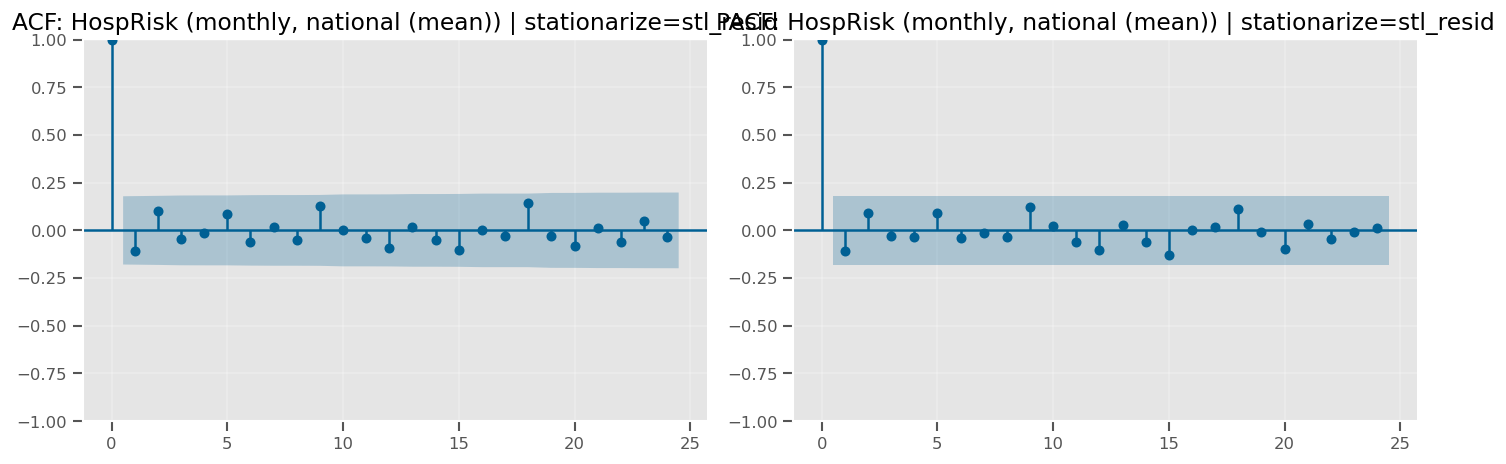

In [128]:
plot_acf_pacf(monthly_complete, value_col="HospRisk", agg_level="monthly", stationarize="stl_resid")


In [32]:
from src.features import build_panel_features

X, y, meta = build_panel_features(
    panel_df=monthly_complete,
    target="HospRisk",
    group_col="State",
    date_col="Date",
    freq="MS",
    add_calendar=True,
    add_lags=True,
    add_rolling=True,
    add_ewm=True,
    lags=(1, 2, 3, 6, 12),
    rolling_windows=(3, 6, 12),
    ewm_spans=(3, 6, 12),
    dropna=True,
)

X.head(), y.head(), meta.head()


(   year  month  quarter  month_sin     month_cos  HospRisk_lag1  \
 0  2016      1        1   0.500000  8.660254e-01       0.604047   
 1  2016      2        1   0.866025  5.000000e-01       1.458312   
 2  2016      3        1   1.000000  6.123234e-17       0.854744   
 3  2016      4        2   0.866025 -5.000000e-01       0.854186   
 4  2016      5        2   0.500000 -8.660254e-01       1.052368   
 
    HospRisk_lag2  HospRisk_lag3  HospRisk_lag6  HospRisk_lag12  \
 0       0.907441       1.313065       1.268649        0.714760   
 1       0.604047       0.907441       1.164498        0.765072   
 2       1.458312       0.604047       0.758802        1.123538   
 3       0.854744       1.458312       1.313065        1.070064   
 4       0.854186       0.854744       0.907441        1.168046   
 
    HospRisk_rollmean3  HospRisk_rollmean6  HospRisk_rollmean12  HospRisk_ewm3  \
 0            0.941518            1.002750             0.993696       0.813459   
 1            0.989934

In [34]:
import pandas as pd
import numpy as np

def yearly_train_ends(meta: pd.DataFrame, date_col: str = "Date") -> list[pd.Timestamp]:
    dates = pd.to_datetime(meta[date_col], errors="raise")
    tmp = pd.DataFrame({"Date": dates})
    tmp["year"] = tmp["Date"].dt.year
    ends = tmp.groupby("year")["Date"].max().sort_values()
    return list(ends.values)

def rolling_origin_masks(
    meta: pd.DataFrame,
    date_col: str,
    train_ends: list[pd.Timestamp],
    test_size: int = 12,
) -> list[dict]:
    dates = pd.to_datetime(meta[date_col], errors="raise")
    unique_dates = pd.Index(np.sort(dates.unique()))

    splits = []
    for te in train_ends:
        te = pd.to_datetime(te)

        train_dates = unique_dates[unique_dates <= te]
        future_dates = unique_dates[unique_dates > te]
        if len(train_dates) == 0 or len(future_dates) == 0:
            continue

        test_dates = future_dates[:test_size]  # truncated if not enough

        train_mask = dates.isin(train_dates)
        test_mask  = dates.isin(test_dates)

        if (train_mask & test_mask).any():
            raise RuntimeError("Overlap detected between train and test.")

        splits.append({
            "train_end": te,
            "test_start": test_dates.min(),
            "test_end": test_dates.max(),
            "n_train_rows": int(train_mask.sum()),
            "n_test_rows": int(test_mask.sum()),
            "n_train_weeks": len(train_dates),
            "n_test_weeks": len(test_dates),
            "train_mask": train_mask,
            "test_mask": test_mask,
        })

    return splits

train_ends = yearly_train_ends(meta, date_col="Date")
splits = rolling_origin_masks(meta, date_col="Date", train_ends=train_ends, test_size=12)

len(train_ends), len(splits)


(9, 8)

In [35]:
split_calendar = pd.DataFrame([
    {
        "train_end": s["train_end"].date(),
        "test_start": s["test_start"].date(),
        "test_end": s["test_end"].date(),
        "train_weeks": s["n_train_weeks"],
        "test_weeks": s["n_test_weeks"],
        "train_rows": s["n_train_rows"],
        "test_rows": s["n_test_rows"],
    }
    for s in splits
])

split_calendar.head(10)


train_end  test_start    test_end  train_weeks  test_weeks  train_rows  \
0  2016-12-01  2017-01-01  2017-12-01           12          12         360   
1  2017-12-01  2018-01-01  2018-12-01           24          12         720   
2  2018-12-01  2019-01-01  2019-12-01           36          12        1080   
3  2019-12-01  2020-01-01  2020-12-01           48          12        1440   
4  2020-12-01  2021-01-01  2021-12-01           60          12        1800   
5  2021-12-01  2022-01-01  2022-12-01           72          12        2160   
6  2022-12-01  2023-01-01  2023-12-01           84          12        2520   
7  2023-12-01  2024-01-01  2024-12-01           96          12        2880   

   test_rows  
0        360  
1        360  
2        360  
3        360  
4        360  
5        360  
6        360  
7        360

In [36]:
# train_end dates you decided to keep
keep_train_ends = {
    pd.Timestamp("2018-12-01"),
    pd.Timestamp("2019-12-01"),
    pd.Timestamp("2020-12-01"),
    pd.Timestamp("2021-12-01"),
    pd.Timestamp("2022-12-01"),
    pd.Timestamp("2023-12-01"),
}

# filter splits
splits_origins = [
    s for s in splits
    if pd.Timestamp(s["train_end"]) in keep_train_ends
]

len(splits_origins), [s["train_end"].date() for s in splits_origins]


(6,
 [datetime.date(2018, 12, 1),
  datetime.date(2019, 12, 1),
  datetime.date(2020, 12, 1),
  datetime.date(2021, 12, 1),
  datetime.date(2022, 12, 1),
  datetime.date(2023, 12, 1)])

In [37]:
from src.models import get_model_configs, instantiate_models
from src.training import fit_global_models

In [66]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, root_mean_squared_error
import pandas as pd
import numpy as np

def rmse(y_true, y_pred):
    return root_mean_squared_error(y_true, y_pred)

neg_rmse_scorer = make_scorer(rmse, greater_is_better=False)

perm_rows = []  # store per-fold importances


In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import numpy as np


results_rows = []

horizons = [1, 3, 6]

for split in splits_origins:
    train_end = split["train_end"]

    for h in horizons:
        # --------------------------------------------------
        # 1. Direct multi-step target
        # --------------------------------------------------
        y_h = (
            y
            .groupby(meta["State"], sort=False)
            .shift(-h)
        )

        y_naive = y.groupby(meta["State"], sort=False).shift(12 - h)
        
        valid_mask = y_h.notna()

        train_mask = split["train_mask"] & valid_mask
        test_mask  = split["test_mask"]  & valid_mask

        valid_mask_naive = valid_mask & (y_naive.notna())
        test_mask_naive = split["test_mask"]  & valid_mask_naive

        X_train = X.loc[train_mask]
        y_train = y_h.loc[train_mask]
        meta_train = meta.loc[train_mask]

        X_test = X.loc[test_mask]
        y_test = y_h.loc[test_mask]
        meta_test = meta.loc[test_mask]

        # --------------------------------------------------
        # 2. Instantiate and fit global models
        # --------------------------------------------------
        model_configs = get_model_configs(
            n_samples=len(X_train),
            use_linear=True,
            use_tree=True,
            random_state=0,
            n_jobs=-1,
        )
        models = instantiate_models(model_configs)

        fitted = fit_global_models(
            models=models,
            X_train=X_train,
            y_train=y_train,
        )

        # for baseline, store naive predictions
        tmp_naive = meta.loc[test_mask_naive].copy()
        tmp_naive["train_end"] = train_end
        tmp_naive["horizon"] = h
        tmp_naive["model"] = "Seasonal Naive"
        tmp_naive["y_true"] = y_h.loc[test_mask_naive].values
        tmp_naive["y_pred"] = y_naive.loc[test_mask_naive].values
        results_rows.append(tmp_naive)
        # --------------------------------------------------
        # 3. Predict and store results (TEST only)
        # --------------------------------------------------
        for model_name, model in fitted.items():
            y_pred = model.predict(X_test)

            tmp = meta_test.copy()
            tmp["train_end"] = train_end
            tmp["horizon"] = h
            tmp["model"] = model_name
            tmp["y_true"] = y_test.values
            tmp["y_pred"] = y_pred

            pi = permutation_importance(
                model,
                X_test,
                y_test,
                scoring=neg_rmse_scorer,
                n_repeats=5,
                random_state=0,
                n_jobs=-1,
            )

            imp = pd.DataFrame({
                "feature": X_test.columns,
                "importance": pi.importances_mean,
                "importance_std": pi.importances_std,
            })
            imp["train_end"] = train_end
            imp["horizon"] = h
            imp["model"] = model_name

            perm_rows.append(imp)
            results_rows.append(tmp)


In [39]:
results_rows

[          State       Date  train_end  horizon  model    y_true    y_pred
 36      ALABAMA 2019-01-01 2018-12-01        1  Ridge  1.209190  1.187323
 37      ALABAMA 2019-02-01 2018-12-01        1  Ridge  1.062597  1.262444
 38      ALABAMA 2019-03-01 2018-12-01        1  Ridge  1.541574  1.281905
 39      ALABAMA 2019-04-01 2018-12-01        1  Ridge  1.299764  1.364823
 40      ALABAMA 2019-05-01 2018-12-01        1  Ridge  1.299139  1.488451
 ...         ...        ...        ...      ...    ...       ...       ...
 3175  WISCONSIN 2019-08-01 2018-12-01        1  Ridge  0.770623  0.895690
 3176  WISCONSIN 2019-09-01 2018-12-01        1  Ridge  0.701543  0.830965
 3177  WISCONSIN 2019-10-01 2018-12-01        1  Ridge  0.868694  0.844801
 3178  WISCONSIN 2019-11-01 2018-12-01        1  Ridge  0.600340  0.797430
 3179  WISCONSIN 2019-12-01 2018-12-01        1  Ridge  1.167056  0.841972
 
 [360 rows x 7 columns],
           State       Date  train_end  horizon  model    y_true    y_pre

In [40]:
results_df = pd.concat(results_rows, ignore_index=True)

results_df.head()



State       Date  train_end  horizon  model    y_true    y_pred
0  ALABAMA 2019-01-01 2018-12-01        1  Ridge  1.209190  1.187323
1  ALABAMA 2019-02-01 2018-12-01        1  Ridge  1.062597  1.262444
2  ALABAMA 2019-03-01 2018-12-01        1  Ridge  1.541574  1.281905
3  ALABAMA 2019-04-01 2018-12-01        1  Ridge  1.299764  1.364823
4  ALABAMA 2019-05-01 2018-12-01        1  Ridge  1.299139  1.488451

In [41]:

results_df.groupby(["train_end", "horizon"]).size()




train_end   horizon
2018-12-01  1          2520
            3          2520
            6          2520
2019-12-01  1          2520
            3          2520
            6          2520
2020-12-01  1          2520
            3          2520
            6          2520
2021-12-01  1          2520
            3          2520
            6          2520
2022-12-01  1          2520
            3          2520
            6          2520
2023-12-01  1          2310
            3          1890
            6          1260
dtype: int64

In [42]:
results_df[["y_true", "y_pred"]].isna().sum()

y_true    0
y_pred    0
dtype: int64

In [43]:
results_df["train_end"].value_counts().sort_index()




train_end
2018-12-01    7560
2019-12-01    7560
2020-12-01    7560
2021-12-01    7560
2022-12-01    7560
2023-12-01    5460
Name: count, dtype: int64

In [44]:
results_df["model"].value_counts()


model
Ridge         6180
Lasso         6180
ElasticNet    6180
PLS           6180
XGBoost       6180
LightGBM      6180
CatBoost      6180
Name: count, dtype: int64

In [45]:
results_df[["y_true", "y_pred"]].describe()


y_true        y_pred
count  43260.000000  43260.000000
mean       0.710543      0.709012
std        0.348081      0.242576
min        0.000000      0.099971
25%        0.458651      0.543498
50%        0.691809      0.705881
75%        0.898314      0.852327
max        2.536900      2.270560

In [46]:
results_df.groupby("horizon")[["y_true", "y_pred"]].mean()


y_true    y_pred
horizon                    
1        0.715697  0.714182
3        0.710249  0.711087
6        0.705306  0.701281

In [86]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import numpy as np

metrics_df = (
    results_df
    .groupby(["train_end", "horizon", "model"])
    .apply(lambda d: pd.Series({
        "rmse": root_mean_squared_error(d["y_true"], d["y_pred"]),
        "mae": mean_absolute_error(d["y_true"], d["y_pred"]),
        "n_obs": len(d),
    }))
    .reset_index()
)

metrics_df


C:\Users\esper\AppData\Local\Temp\ipykernel_30096\3932568750.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: pd.Series({


train_end  horizon       model      rmse       mae  n_obs
0   2018-12-01        1    CatBoost  0.308057  0.228470  360.0
1   2018-12-01        1  ElasticNet  0.305181  0.228296  360.0
2   2018-12-01        1       Lasso  0.304479  0.227937  360.0
3   2018-12-01        1    LightGBM  0.307989  0.230513  360.0
4   2018-12-01        1         PLS  0.304551  0.228699  360.0
..         ...      ...         ...       ...       ...    ...
121 2023-12-01        6       Lasso  0.283818  0.209311  180.0
122 2023-12-01        6    LightGBM  0.280955  0.203521  180.0
123 2023-12-01        6         PLS  0.284898  0.210463  180.0
124 2023-12-01        6       Ridge  0.285365  0.210174  180.0
125 2023-12-01        6     XGBoost  0.276651  0.201949  180.0

[126 rows x 6 columns]

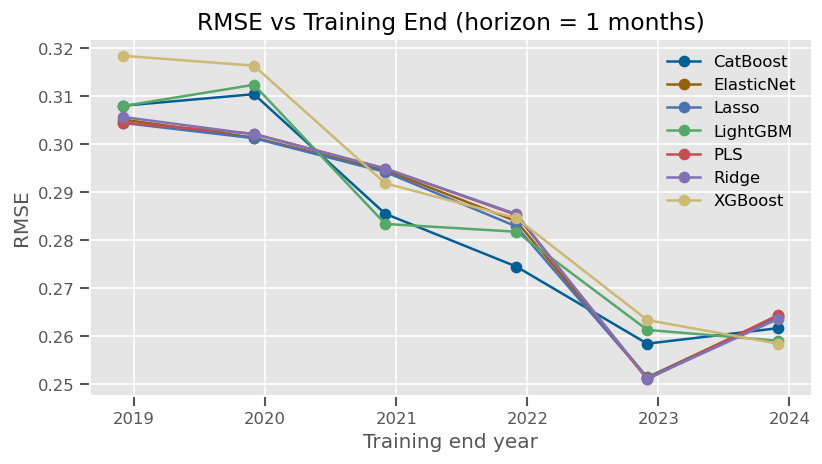

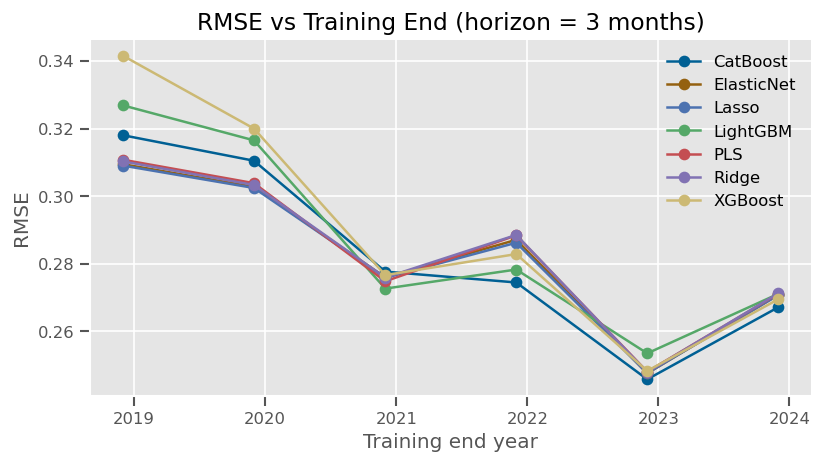

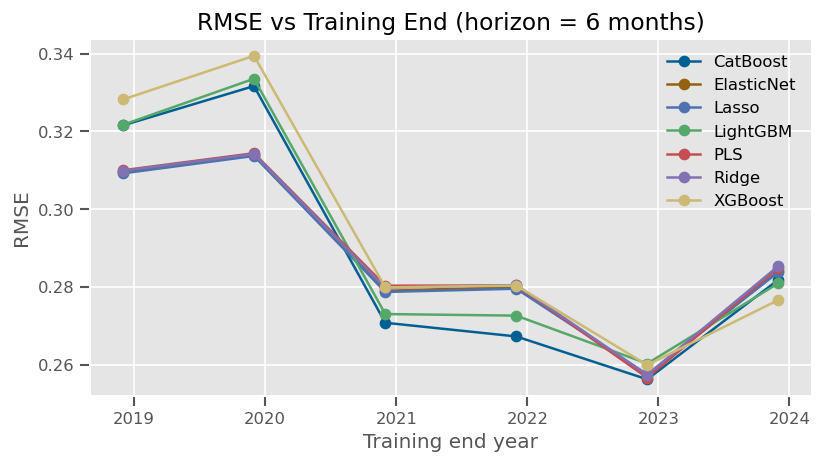

In [48]:
import matplotlib.pyplot as plt

horizons = sorted(metrics_df["horizon"].unique())

for h in horizons:
    df_h = metrics_df[metrics_df["horizon"] == h]

    plt.figure(figsize=(7, 4))
    for model in df_h["model"].unique():
        d = df_h[df_h["model"] == model]
        plt.plot(d["train_end"], d["rmse"], marker="o", label=model)

    plt.title(f"RMSE vs Training End (horizon = {h} months)")
    plt.xlabel("Training end year")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


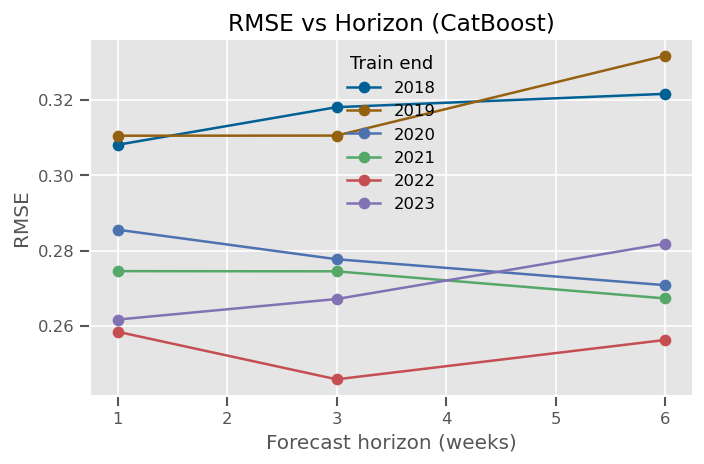

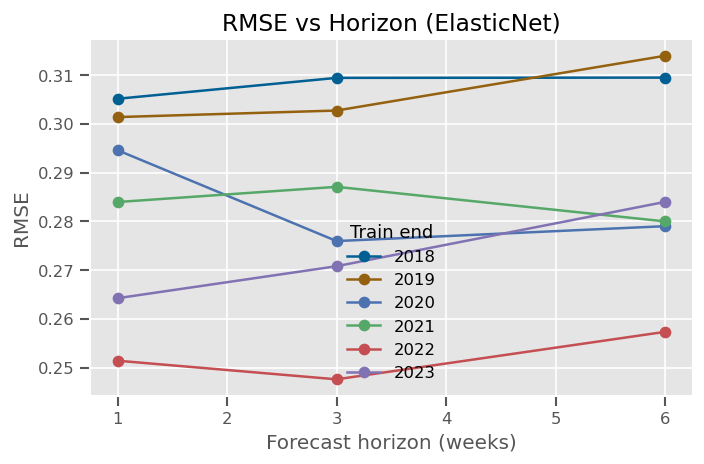

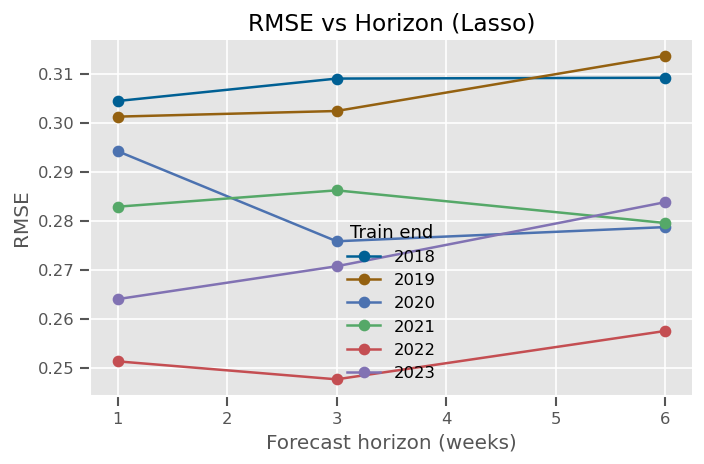

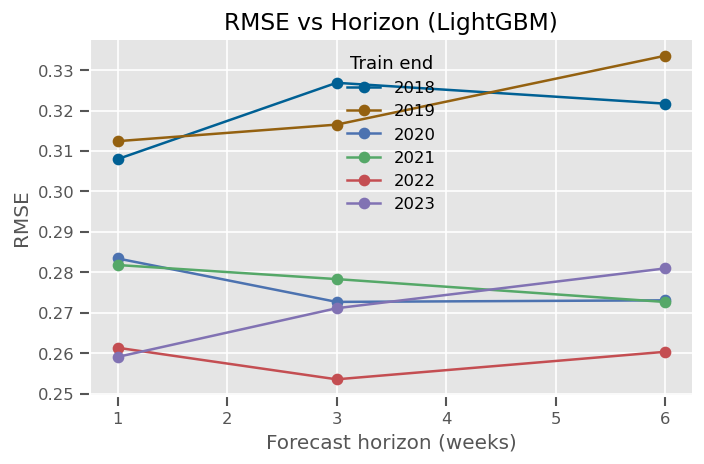

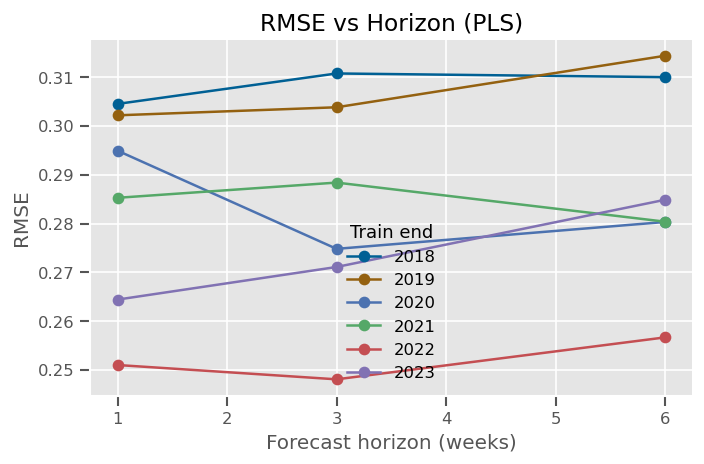

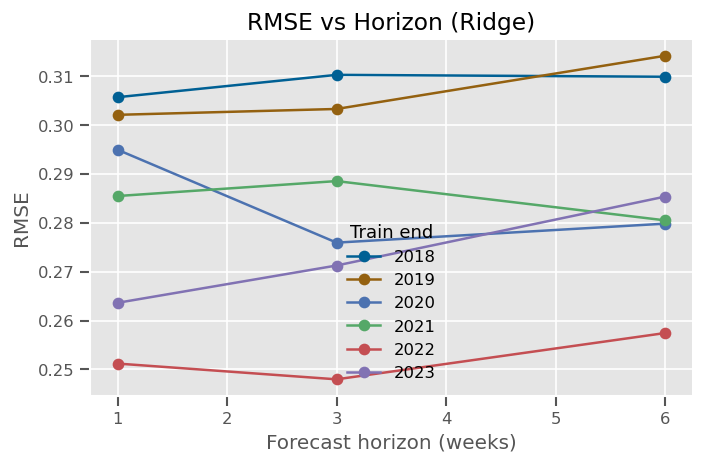

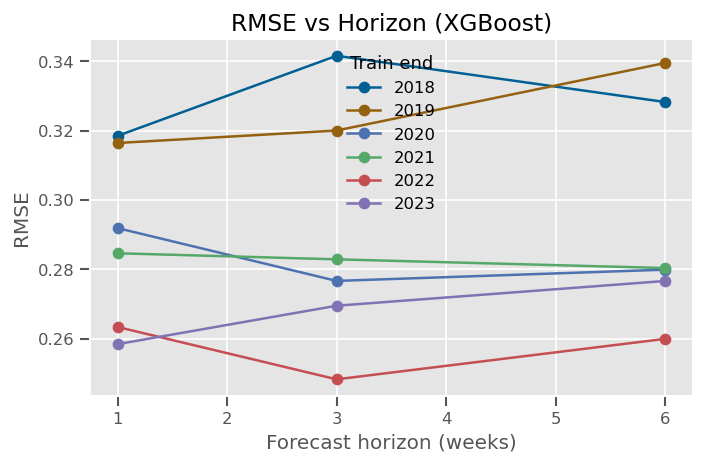

In [49]:
for model in metrics_df["model"].unique():
    d = metrics_df[metrics_df["model"] == model]

    plt.figure(figsize=(6, 4))
    for te in sorted(d["train_end"].unique()):
        dd = d[d["train_end"] == te]
        plt.plot(dd["horizon"], dd["rmse"], marker="o", label=str(te.year))

    plt.title(f"RMSE vs Horizon ({model})")
    plt.xlabel("Forecast horizon (weeks)")
    plt.ylabel("RMSE")
    plt.legend(title="Train end")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [51]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, root_mean_squared_error
import pandas as pd
import numpy as np

def rmse(y_true, y_pred):
    return root_mean_squared_error(y_true, y_pred)

neg_rmse_scorer = make_scorer(rmse, greater_is_better=False)


In [52]:
perm_rows = []      # feature-level permutation importance
coef_rows = []      # optional: linear coefficients


In [54]:
if model_name.lower() in {"ridge", "lasso"} and hasattr(model, "coef_"):
    coefs = pd.DataFrame({
        "feature": X_train.columns,
        "coef": model.coef_,
        "abs_coef": np.abs(model.coef_),
    })
    coefs["train_end"] = train_end
    coefs["horizon"] = h
    coefs["model"] = model_name
    coef_rows.append(coefs)


In [68]:
perm_df = pd.concat(perm_rows, ignore_index=True)

summary = (
    perm_df
    .groupby(["model", "horizon", "feature"])["importance"]
    .agg(
        median="median",
        q25=lambda x: x.quantile(0.25),
        q75=lambda x: x.quantile(0.75),
        mean="mean",
    )
    .reset_index()
    .sort_values(["model", "horizon", "median"], ascending=[True, True, False])
)

summary['model'].value_counts()


model
CatBoost      48
ElasticNet    48
Lasso         48
LightGBM      48
PLS           48
Ridge         48
XGBoost       48
Name: count, dtype: int64

In [69]:
top15 = summary.groupby(["model", "horizon"]).head(15)
top15


model  horizon              feature    median       q25       q75  \
8    CatBoost        1  HospRisk_rollmean12  0.025328  0.023269  0.029734   
0    CatBoost        1       HospRisk_ewm12  0.009014  0.005938  0.009442   
12   CatBoost        1            month_cos  0.004818  0.004124  0.005193   
2    CatBoost        1        HospRisk_ewm6  0.002149  0.001937  0.003095   
4    CatBoost        1       HospRisk_lag12  0.001957  0.001150  0.002664   
..        ...      ...                  ...       ...       ...       ...   
326   XGBoost        6        HospRisk_lag3  0.001682  0.000495  0.002567   
325   XGBoost        6        HospRisk_lag2  0.001540 -0.000091  0.003368   
332   XGBoost        6            month_cos  0.000527  0.000067  0.000661   
334   XGBoost        6              quarter  0.000000  0.000000  0.000000   
335   XGBoost        6                 year  0.000000  0.000000  0.000000   

         mean  
8    0.032407  
0    0.007617  
12   0.004604  
2    0.001962  
4    0.001930  
..        ...  
326  0.001391  
325  0.001105  
332  0.000306  
334  0.000000  
335  0.000000  

[315 rows x 7 columns]

In [70]:


def summarize_permutation_importance(perm_df: pd.DataFrame) -> pd.DataFrame:
    """
    perm_df columns expected:
      ['feature','importance','train_end','horizon','model'] (+ optional 'importance_std')
    Returns:
      model, horizon, feature, median, q25, q75, iqr, mean
    """
    out = (
        perm_df
        .groupby(["model", "horizon", "feature"])["importance"]
        .agg(
            median="median",
            q25=lambda x: x.quantile(0.25),
            q75=lambda x: x.quantile(0.75),
            mean="mean",
        )
        .reset_index()
    )
    out["iqr"] = out["q75"] - out["q25"]
    return out



In [71]:
imp_summary = summarize_permutation_importance(perm_df)


In [74]:
imp_summary.head(20)

model  horizon              feature    median       q25       q75  \
0   CatBoost        1       HospRisk_ewm12  0.009014  0.005938  0.009442   
1   CatBoost        1        HospRisk_ewm3  0.000735 -0.000275  0.002094   
2   CatBoost        1        HospRisk_ewm6  0.002149  0.001937  0.003095   
3   CatBoost        1        HospRisk_lag1  0.000349 -0.000004  0.000833   
4   CatBoost        1       HospRisk_lag12  0.001957  0.001150  0.002664   
5   CatBoost        1        HospRisk_lag2  0.000811  0.000723  0.001164   
6   CatBoost        1        HospRisk_lag3  0.000084  0.000008  0.000495   
7   CatBoost        1        HospRisk_lag6  0.001807  0.000854  0.002019   
8   CatBoost        1  HospRisk_rollmean12  0.025328  0.023269  0.029734   
9   CatBoost        1   HospRisk_rollmean3  0.000425  0.000129  0.001317   
10  CatBoost        1   HospRisk_rollmean6  0.000965  0.000640  0.002157   
11  CatBoost        1                month -0.000329 -0.000643 -0.000044   
12  CatBoost        1            month_cos  0.004818  0.004124  0.005193   
13  CatBoost        1            month_sin  0.000040 -0.000162  0.000274   
14  CatBoost        1              quarter  0.000127 -0.000155  0.000260   
15  CatBoost        1                 year  0.000000  0.000000  0.000000   
16  CatBoost        3       HospRisk_ewm12  0.010098  0.007106  0.013512   
17  CatBoost        3        HospRisk_ewm3  0.002750  0.001742  0.004735   
18  CatBoost        3        HospRisk_ewm6  0.002193  0.001094  0.003201   
19  CatBoost        3        HospRisk_lag1 -0.000239 -0.001767  0.000273   

        mean       iqr  
0   0.007617  0.003503  
1   0.001698  0.002368  
2   0.001962  0.001158  
3   0.000421  0.000836  
4   0.001930  0.001514  
5   0.001026  0.000441  
6   0.000450  0.000486  
7   0.001802  0.001165  
8   0.032407  0.006465  
9   0.000540  0.001187  
10  0.001343  0.001517  
11 -0.000312  0.000599  
12  0.004604  0.001069  
13  0.000031  0.000436  
14 -0.000026  0.000414  
15  0.000000  0.000000  
16  0.011242  0.006406  
17  0.003402  0.002994  
18  0.002257  0.002107  
19 -0.000654  0.002040

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def plot_perm_importance_topk(
    imp_summary: pd.DataFrame,
    model: str,
    horizon: int,
    k: int = 20,
    min_importance: float | None = None,
) -> None:
    """
    Plots top-k permutation importances using median across folds, with IQR error bars.
    """
    df = imp_summary[(imp_summary["model"] == model) & (imp_summary["horizon"] == horizon)].copy()
    df = df.sort_values("median", ascending=False)

    if min_importance is not None:
        df = df[df["median"] >= min_importance]

    df = df.head(k).sort_values("median", ascending=True)  # reverse for barh

    y = df["feature"].values
    x = df["median"].values

    # error bars: distance from median to q25/q75
    xerr = np.vstack([x - df["q25"].values, df["q75"].values - x])

    plt.figure(figsize=(10, max(4, 0.35 * len(df))))
    plt.barh(y, x, xerr=xerr)
    plt.title(f"Permutation importance (RMSE increase) — {model}, horizon={horizon}")
    plt.xlabel("Importance (median ΔRMSE when feature is permuted)")
    plt.ylabel("")
    plt.grid(alpha=0.3, axis="x")
    plt.tight_layout()
    plt.show()


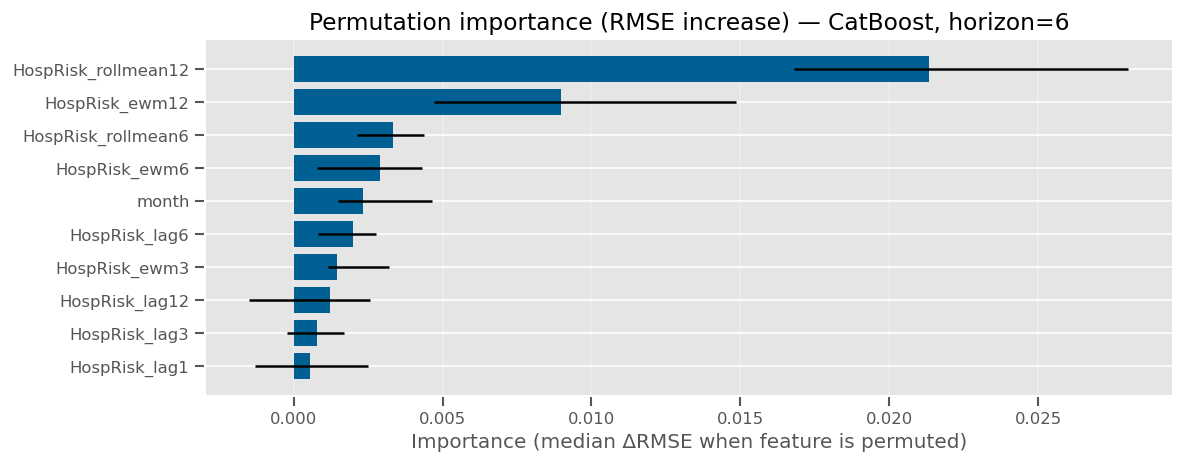

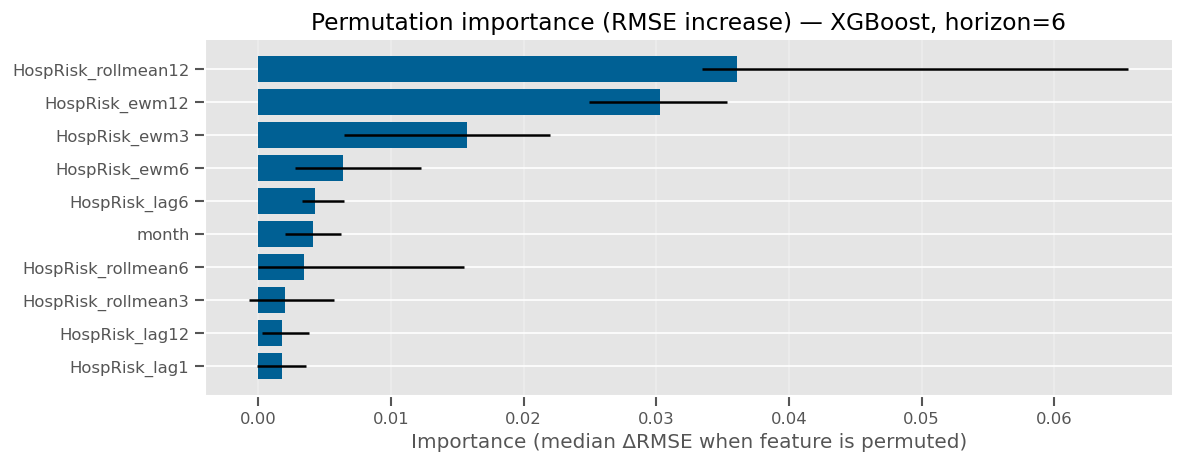

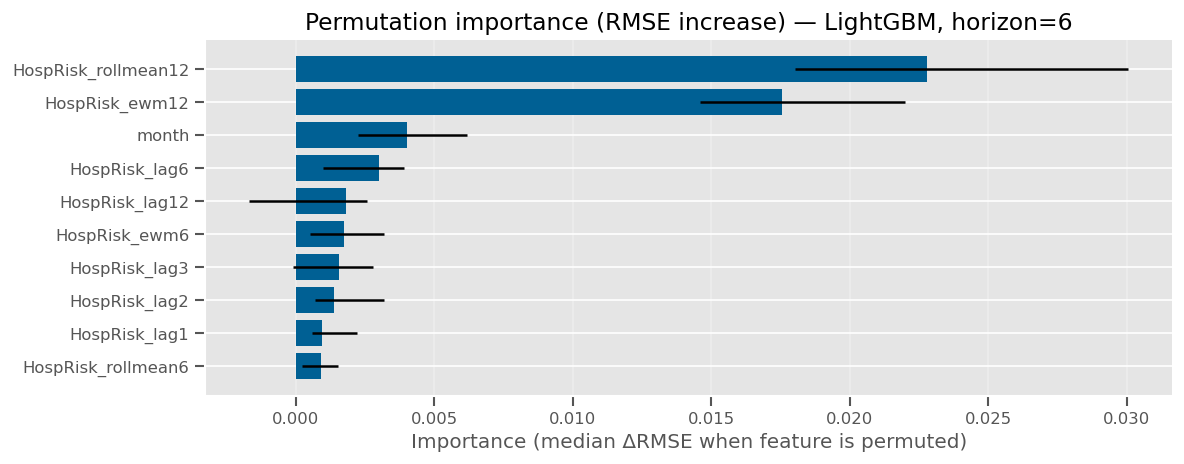

In [80]:
plot_perm_importance_topk(imp_summary, model="CatBoost", horizon=6, k=10)
plot_perm_importance_topk(imp_summary, model="XGBoost",  horizon=6, k=10)
plot_perm_importance_topk(imp_summary, model="LightGBM", horizon=6, k=10)


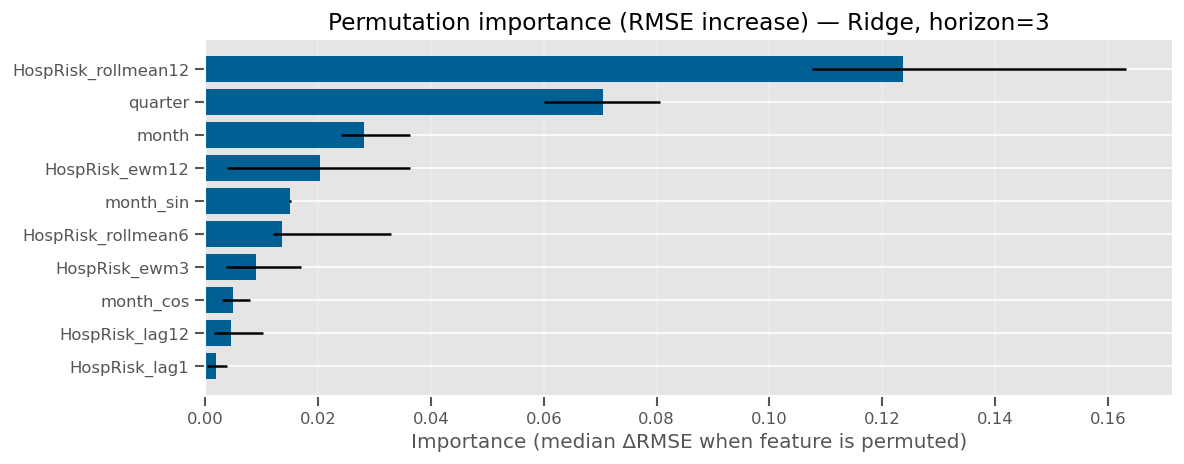

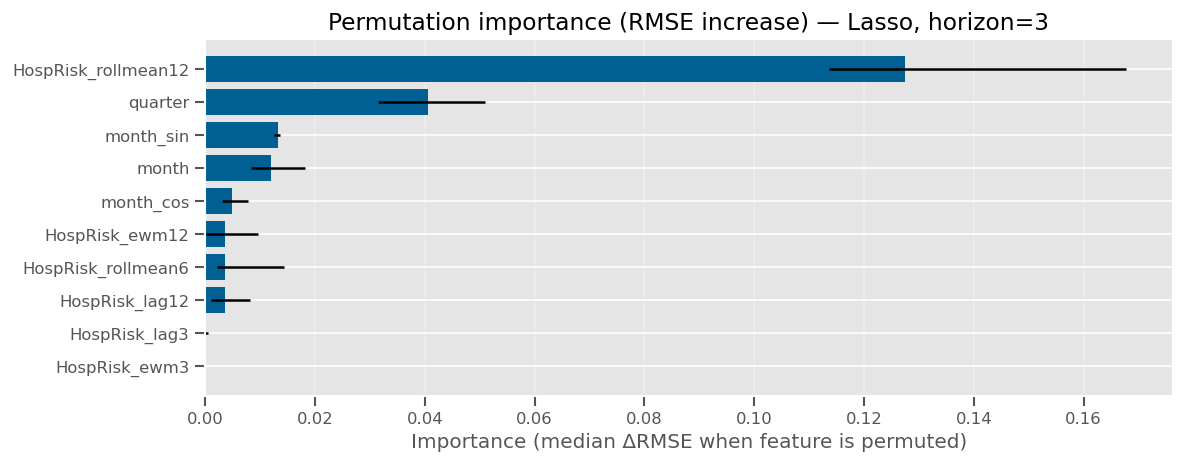

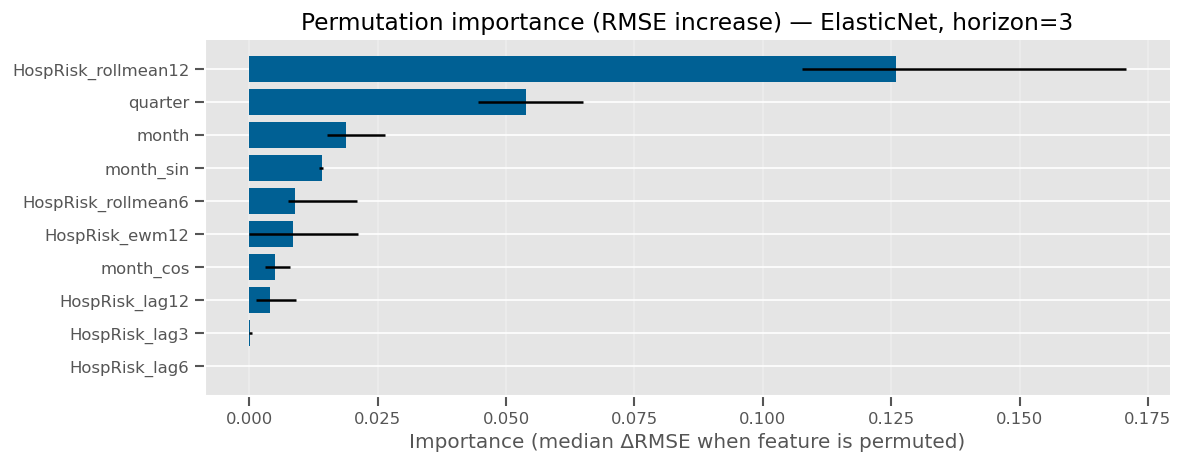

In [79]:
plot_perm_importance_topk(imp_summary, model="Ridge", horizon=3, k=10)
plot_perm_importance_topk(imp_summary, model="Lasso",  horizon=3, k=10)
plot_perm_importance_topk(imp_summary, model="ElasticNet", horizon=3, k=10)

In [81]:
rmse_by_fold = (
    results_df
    .groupby(["model", "horizon", "train_end"])
    .apply(lambda x: np.sqrt(root_mean_squared_error(x["y_true"], x["y_pred"])))
    .reset_index(name="rmse")
)

C:\Users\esper\AppData\Local\Temp\ipykernel_30096\217225566.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.sqrt(root_mean_squared_error(x["y_true"], x["y_pred"])))


In [82]:
rmse_summary = (
    rmse_by_fold
    .groupby(["model", "horizon"])["rmse"]
    .agg(
        mean_rmse="mean",
        median_rmse="median",
        std_rmse="std"
    )
    .reset_index()
    .sort_values(["horizon", "mean_rmse"])
)


In [83]:
overall_rmse = (
    rmse_by_fold
    .groupby("model")["rmse"]
    .mean()
    .reset_index(name="overall_mean_rmse")
    .sort_values("overall_mean_rmse")
)

overall_rmse


model  overall_mean_rmse
2       Lasso           0.532634
1  ElasticNet           0.532930
0    CatBoost           0.532933
4         PLS           0.533327
5       Ridge           0.533393
3    LightGBM           0.535296
6     XGBoost           0.538756

In [84]:
rmse_stability = (
    rmse_by_fold
    .groupby("model")["rmse"]
    .agg(mean="mean", std="std", median="median")
    .reset_index()
    .sort_values("mean")
)

rmse_stability


model      mean       std    median
2       Lasso  0.532634  0.019270  0.532317
1  ElasticNet  0.532930  0.019391  0.532922
0    CatBoost  0.532933  0.023838  0.525472
4         PLS  0.533327  0.019644  0.533949
5       Ridge  0.533393  0.019583  0.534253
3    LightGBM  0.535296  0.023724  0.528805
6     XGBoost  0.538756  0.026712  0.530691

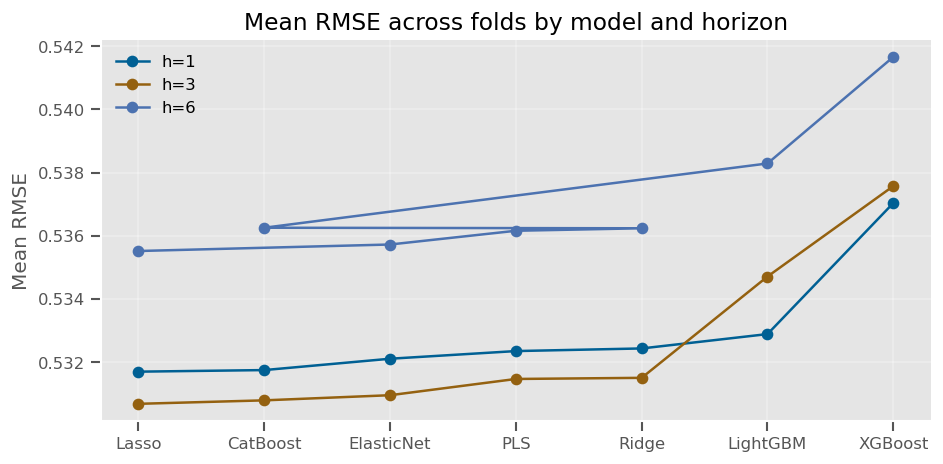

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
for h in sorted(rmse_by_fold["horizon"].unique()):
    subset = rmse_summary[rmse_summary["horizon"] == h]
    plt.plot(subset["model"], subset["mean_rmse"], marker="o", label=f"h={h}")

plt.ylabel("Mean RMSE")
plt.title("Mean RMSE across folds by model and horizon")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
